# EDA

In [126]:
libs = ["numpy", "pandas", "matplotlib", "seaborn", "plotly"]

def install_missing(libs):
    import importlib, subprocess, sys
    for lib in libs:
        try:
            importlib.import_module(lib)
        except ImportError:
            print(f"Installing {lib}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

install_missing(libs)

# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [127]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "nbformat"])


0

In [128]:
%pip install gdown plotly
import os
import subprocess

if not os.path.exists("taxi_price.csv"):
    subprocess.run(["gdown", "1w30FAYe9SU5ARU6cBYV4AxOc3FlvL7xZ", "-O", "taxi_price.csv"])

Note: you may need to restart the kernel to use updated packages.


In [129]:
df = pd.read_csv("taxi_price.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [130]:
df.dtypes


Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [131]:
import plotly.graph_objects as go

# Map the traffic conditions to numerical values
color_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic_Conditions_num'] = df['Traffic_Conditions'].map(color_map)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Trip_Distance_km'],
    y=df['Trip_Price'],
    z=df['Trip_Duration_Minutes'],
    mode='markers',
    marker=dict(color=df['Traffic_Conditions_num'], colorscale='Viridis')
)])

fig.update_layout(scene=dict(
    xaxis_title='Trip Distance (km)',
    yaxis_title='Trip Price',
    zaxis_title='Trip Duration (Minutes)'
))


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        950 non-null    float64
 1   Time_of_Day             950 non-null    object 
 2   Day_of_Week             950 non-null    object 
 3   Passenger_Count         950 non-null    float64
 4   Traffic_Conditions      950 non-null    object 
 5   Weather                 950 non-null    object 
 6   Base_Fare               950 non-null    float64
 7   Per_Km_Rate             950 non-null    float64
 8   Per_Minute_Rate         950 non-null    float64
 9   Trip_Duration_Minutes   950 non-null    float64
 10  Trip_Price              951 non-null    float64
 11  Traffic_Conditions_num  950 non-null    float64
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [133]:
df.isnull().sum()

Trip_Distance_km          50
Time_of_Day               50
Day_of_Week               50
Passenger_Count           50
Traffic_Conditions        50
Weather                   50
Base_Fare                 50
Per_Km_Rate               50
Per_Minute_Rate           50
Trip_Duration_Minutes     50
Trip_Price                49
Traffic_Conditions_num    50
dtype: int64

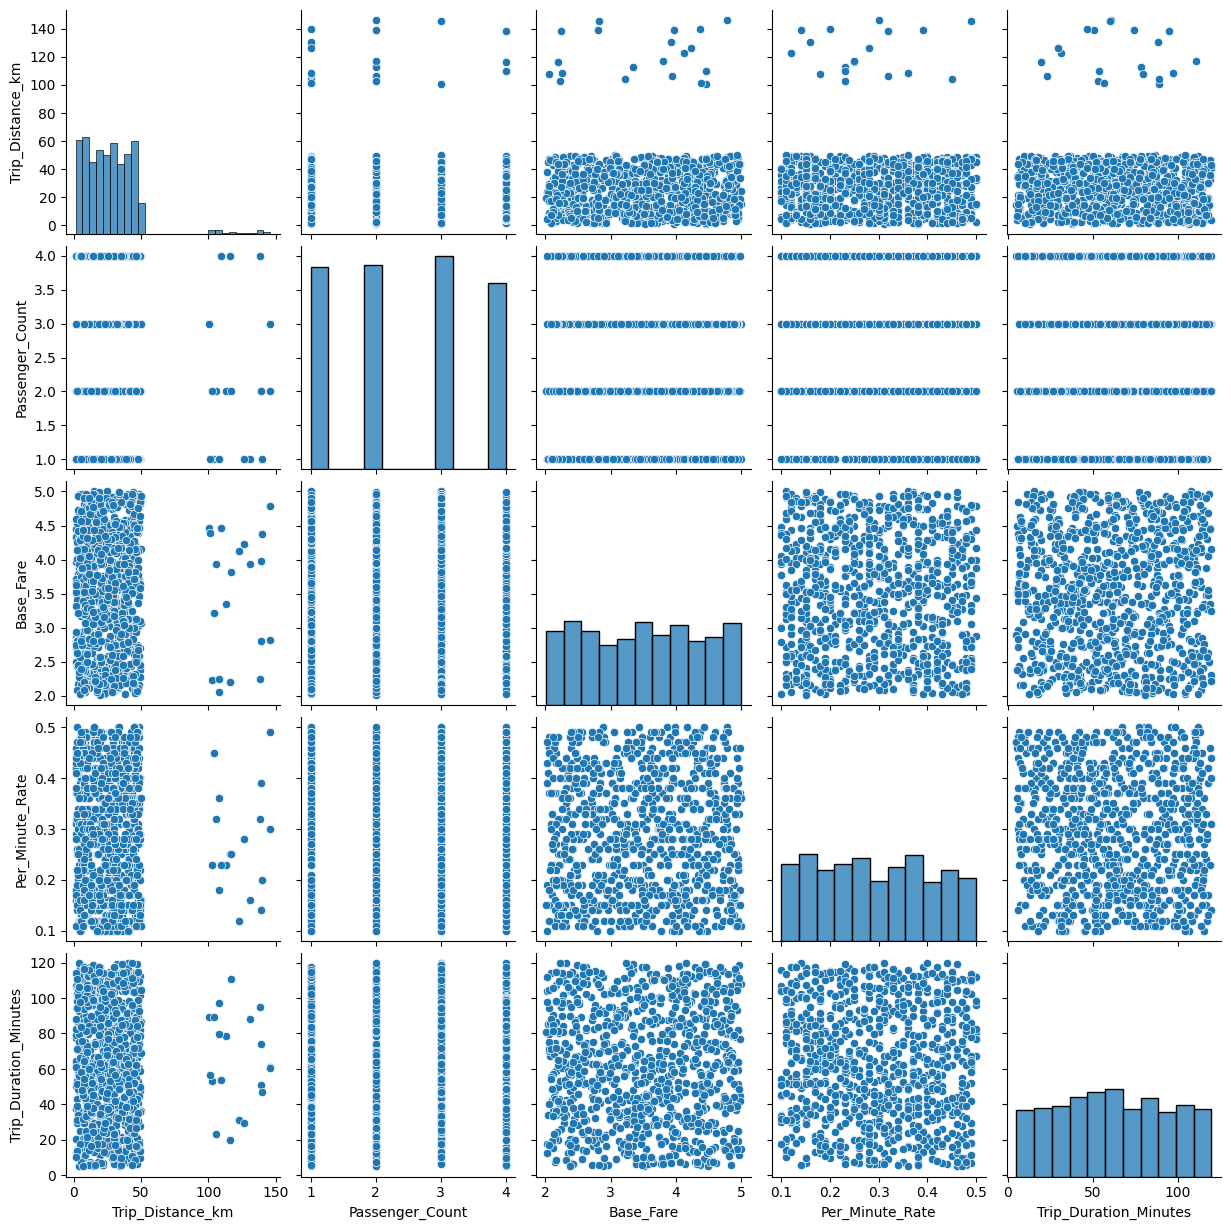

In [134]:
cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

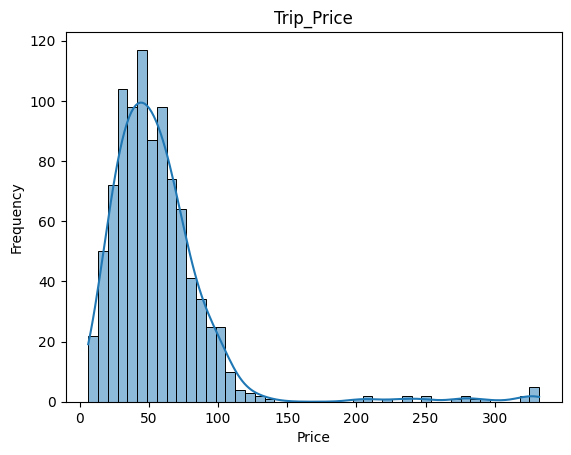

In [135]:
sns.histplot(df['Trip_Price'], kde=True)  
plt.title("Trip_Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

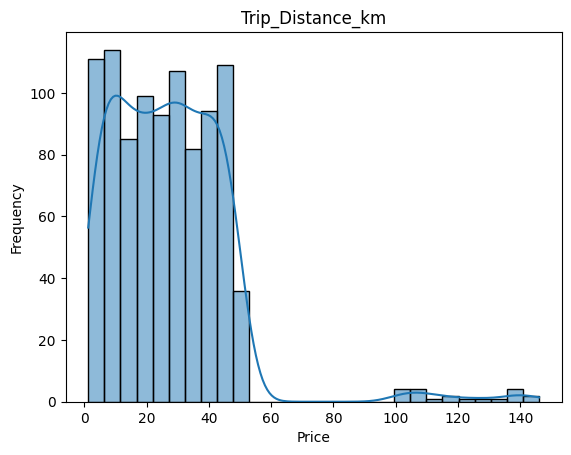

In [136]:
sns.histplot(df['Trip_Distance_km'], kde=True)  
plt.title("Trip_Distance_km")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [137]:
num_duplicates = df.duplicated().sum()
print(f"Count of duplicates: {num_duplicates}")

Count of duplicates: 0


In [138]:
print("="*70)
print("KIỂM TRA MISSING VALUES")
print("="*70)

columns_miss = df.columns[df.isnull().sum() > 0].tolist()

if len(columns_miss) > 0:
    print(f"\n⚠️  Các cột có missing values: {columns_miss}")
    print(f"\nChitiết:")
    print(df[columns_miss].isnull().sum())
else:
    print("\n✅ Không có missing values")

KIỂM TRA MISSING VALUES

⚠️  Các cột có missing values: ['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Traffic_Conditions_num']

Chitiết:
Trip_Distance_km          50
Time_of_Day               50
Day_of_Week               50
Passenger_Count           50
Traffic_Conditions        50
Weather                   50
Base_Fare                 50
Per_Km_Rate               50
Per_Minute_Rate           50
Trip_Duration_Minutes     50
Trip_Price                49
Traffic_Conditions_num    50
dtype: int64


Trip_Distance_km - Среднее: 27.070546861761322, Медиана: 25.83


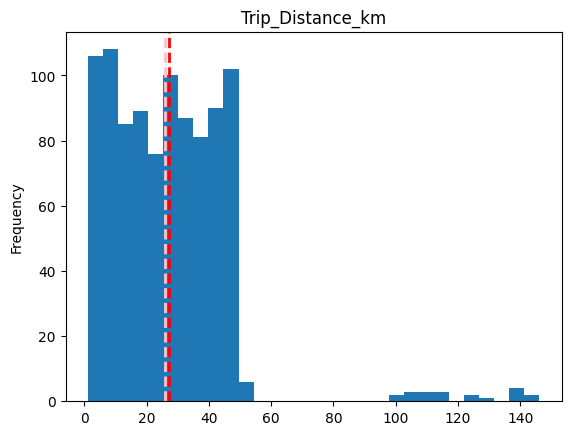

Passenger_Count - Среднее: 2.4768421052631577, Медиана: 2.0


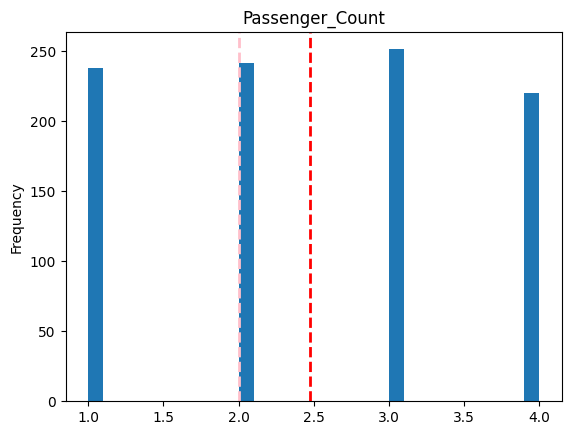

Base_Fare - Среднее: 3.502989473684211, Медиана: 3.52


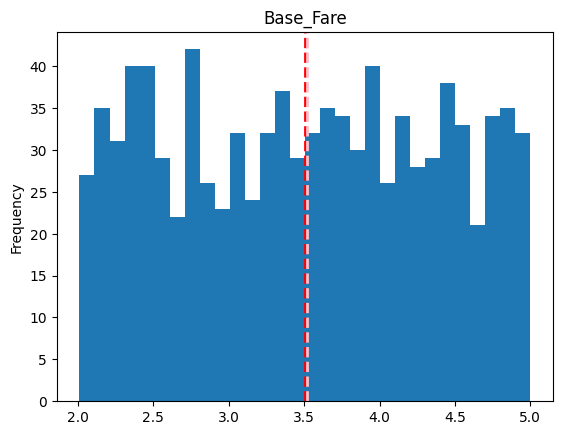

Per_Km_Rate - Среднее: 1.2333157894736844, Медиана: 1.22


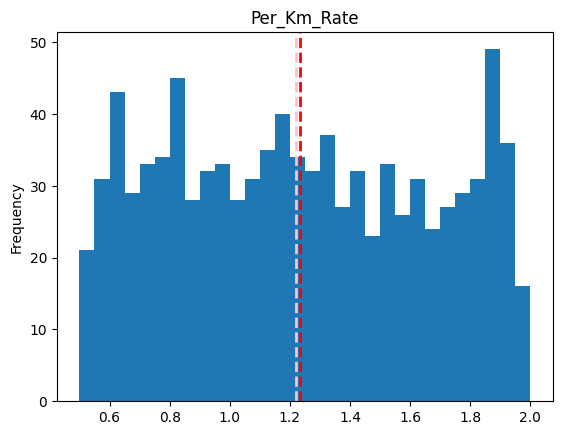

Per_Minute_Rate - Среднее: 0.2929157894736842, Медиана: 0.29


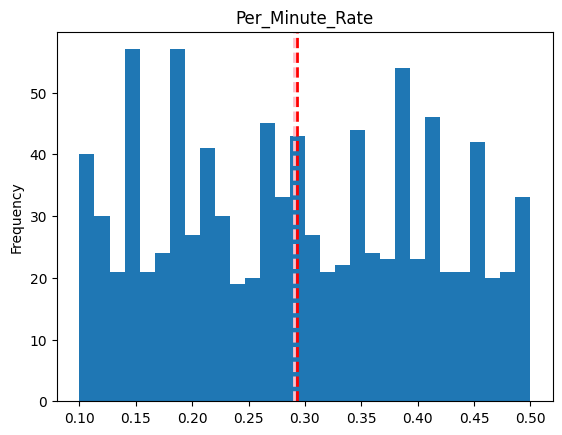

Trip_Duration_Minutes - Среднее: 62.11811578947369, Медиана: 61.86


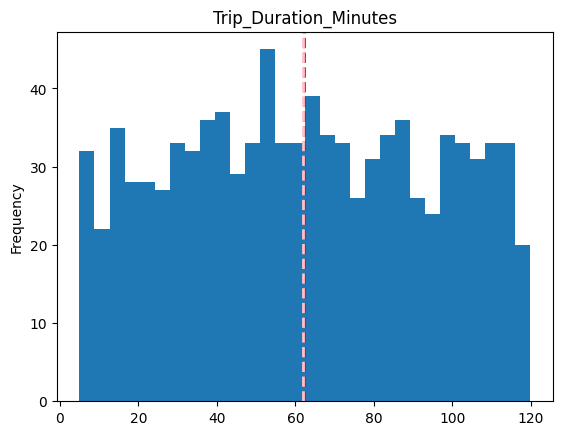

Trip_Price - Среднее: 56.87477332571041, Медиана: 50.07450000000001


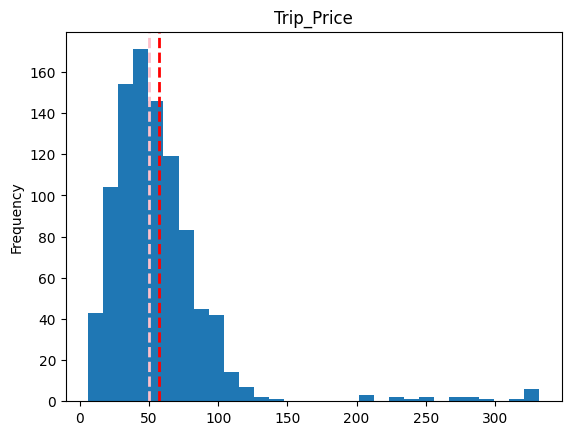

In [139]:
columns_with_missing = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
                       'Per_Minute_Rate', 'Trip_Duration_Minutes',
                       'Trip_Price']

for i in columns_with_missing:
    print(f"{i} - Среднее: {df[i].mean()}, Медиана: {df[i].median()}")
    df[i].plot(kind='hist', bins=30, title=i)
    plt.axvline(df[i].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(df[i].median(), color='pink', linestyle='dashed', linewidth=2)
    plt.show()

In [140]:
# Cell này bị duplicate - xóa để tránh lặp lại

In [141]:
# Kiểm tra lại missing sau khi fill
print(f"\n✅ Sau khi xử lý missing values:")
print(f"Total missing: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() == 0:
    print("✅ Không còn missing values nào!")


✅ Sau khi xử lý missing values:
Total missing: 599


In [142]:
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

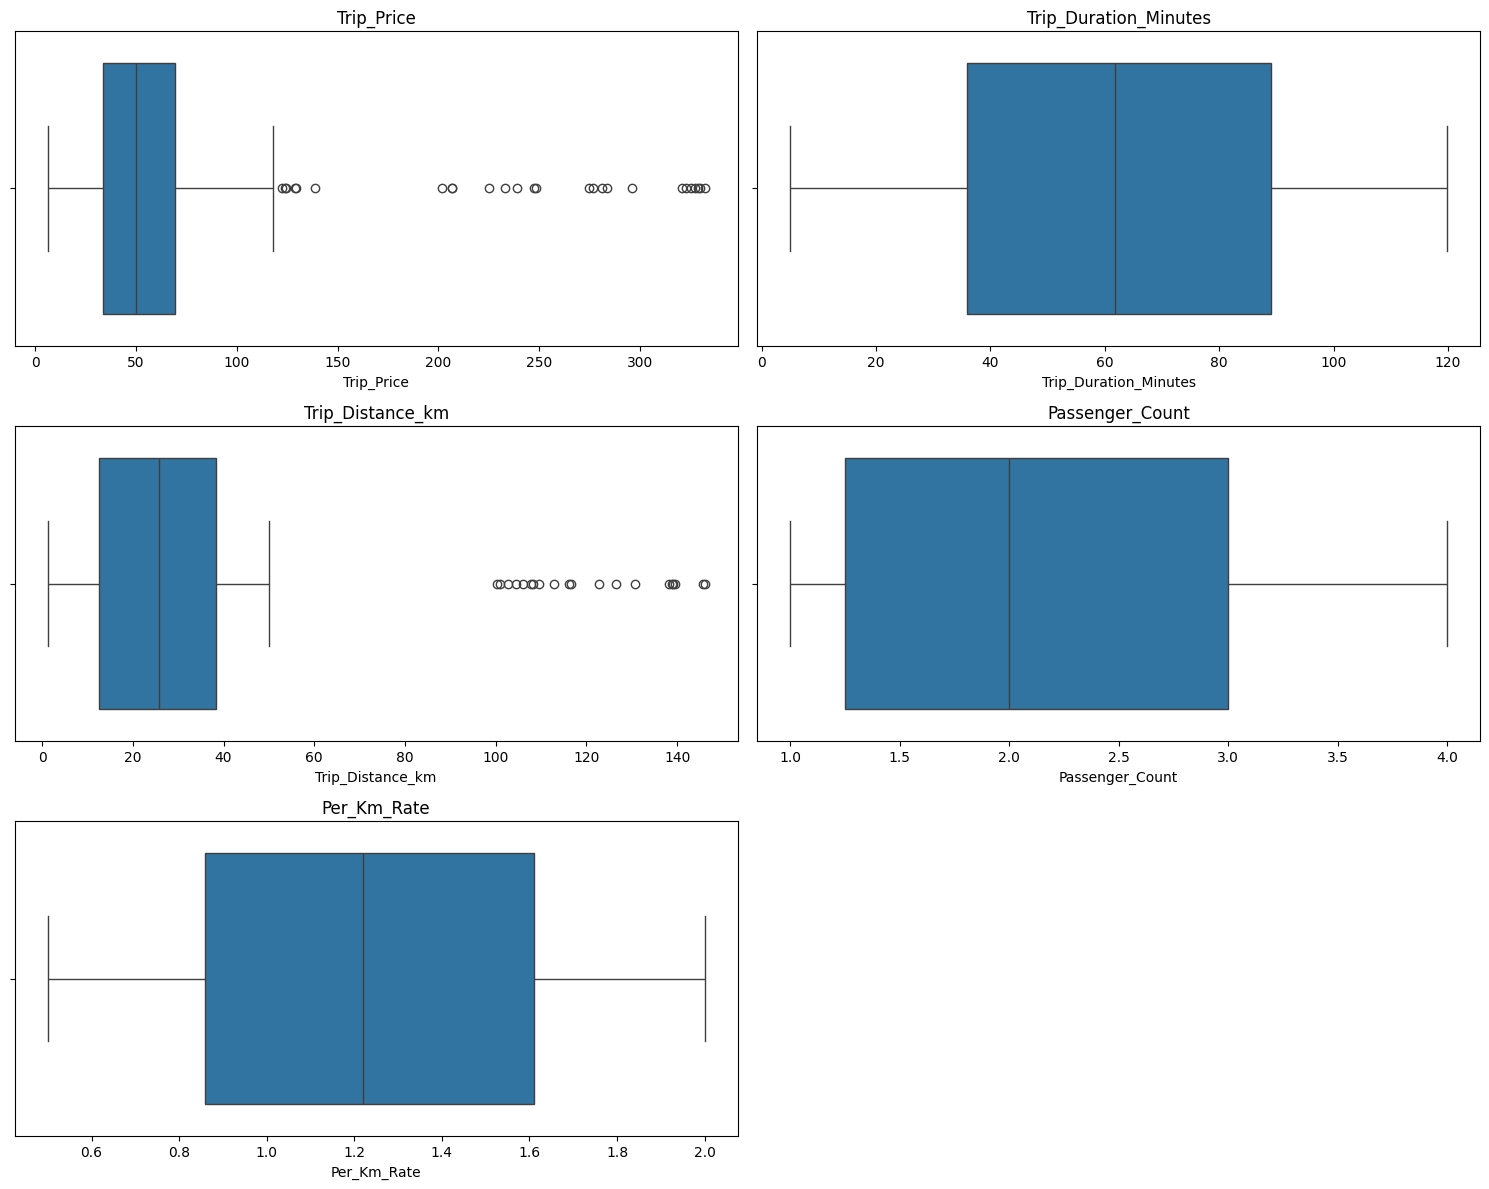

In [143]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.boxplot(x=df['Trip_Price'], ax=axes[0, 0])
axes[0, 0].set_title('Trip_Price')

sns.boxplot(x=df['Trip_Duration_Minutes'], ax=axes[0, 1])
axes[0, 1].set_title('Trip_Duration_Minutes')

sns.boxplot(x=df['Trip_Distance_km'], ax=axes[1, 0])
axes[1, 0].set_title('Trip_Distance_km')

sns.boxplot(x=df['Passenger_Count'], ax=axes[1, 1])
axes[1, 1].set_title('Passenger_Count')

sns.boxplot(x=df['Per_Km_Rate'], ax=axes[2, 0])
axes[2, 0].set_title('Per_Km_Rate')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

                        Trip_Distance_km  Passenger_Count  Base_Fare  \
Trip_Distance_km                1.000000        -0.029324   0.045416   
Passenger_Count                -0.029324         1.000000   0.024339   
Base_Fare                       0.045416         0.024339   1.000000   
Per_Km_Rate                    -0.034926         0.030553   0.000713   
Per_Minute_Rate                -0.020517         0.034428  -0.018217   
Trip_Duration_Minutes          -0.036026         0.022191   0.013107   
Trip_Price                      0.722387         0.024689   0.046215   
Traffic_Conditions_num          0.075341        -0.012899   0.017260   

                        Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  \
Trip_Distance_km          -0.034926        -0.020517              -0.036026   
Passenger_Count            0.030553         0.034428               0.022191   
Base_Fare                  0.000713        -0.018217               0.013107   
Per_Km_Rate                1.000000

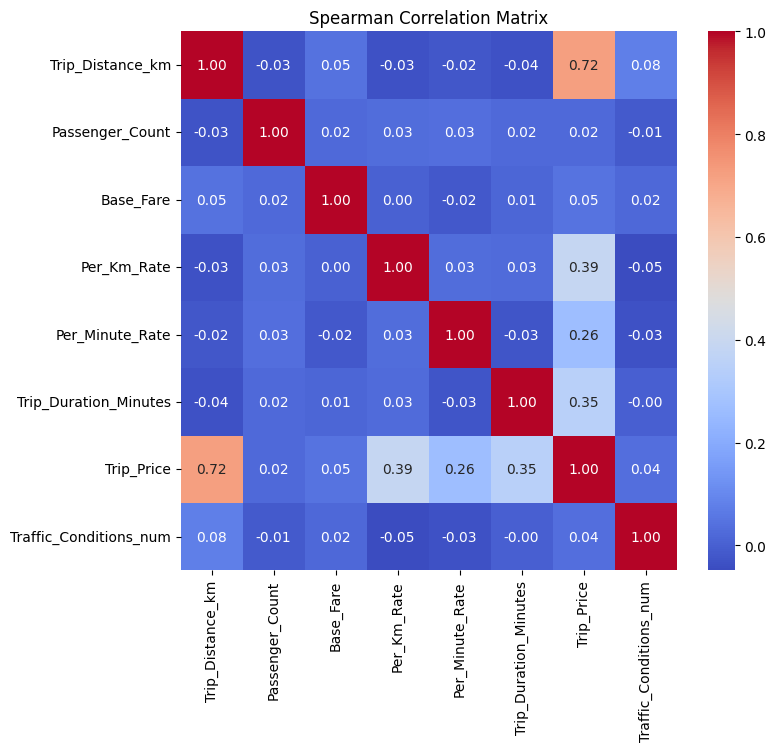

In [144]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

# Выводим матрицу корреляции
print(spearman_corr)

# Построение тепловой карты для визуализации матрицы корреляции
plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [145]:
print("\n" + "="*70)
print("ENCODING CATEGORICAL VARIABLES")
print("="*70)

df = pd.get_dummies(df, columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], drop_first=True)

print(f"\n✅ Encoding hoàn tất")
print(f"Shape sau encoding: {df.shape}")


ENCODING CATEGORICAL VARIABLES

✅ Encoding hoàn tất
Shape sau encoding: (1000, 16)


In [146]:
print("\n" + "="*70)
print("THÔNG TIN DỮ LIỆU SAU TIỀN XỬ LÝ")
print("="*70)
df.info()


THÔNG TIN DỮ LIỆU SAU TIỀN XỬ LÝ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           950 non-null    float64
 1   Passenger_Count            950 non-null    float64
 2   Base_Fare                  950 non-null    float64
 3   Per_Km_Rate                950 non-null    float64
 4   Per_Minute_Rate            950 non-null    float64
 5   Trip_Duration_Minutes      950 non-null    float64
 6   Trip_Price                 951 non-null    float64
 7   Traffic_Conditions_num     950 non-null    float64
 8   Time_of_Day_Evening        1000 non-null   bool   
 9   Time_of_Day_Morning        1000 non-null   bool   
 10  Time_of_Day_Night          1000 non-null   bool   
 11  Day_of_Week_Weekend        1000 non-null   bool   
 12  Traffic_Conditions_Low     1000 non-null   bool   
 13  Traffic_Conditi

In [147]:
print("\n" + "="*70)
print("LOẠI BỎ DÒNG CÓ MISSING VALUES")
print("="*70)

print(f"Dòng trước dropna: {len(df)}")
df = df.dropna()
print(f"Dòng sau dropna: {len(df)}")
print(f"Mất {len(df.dropna()) - len(df)} dòng")

print(f"\n✅ Dữ liệu EDA hoàn tất!")
print(f"Final shape: {df.shape}")


LOẠI BỎ DÒNG CÓ MISSING VALUES
Dòng trước dropna: 1000
Dòng sau dropna: 662
Mất 0 dòng

✅ Dữ liệu EDA hoàn tất!
Final shape: (662, 16)


## Phần 3: Model Training với Optimization

In [148]:
%pip install optuna xgboost scikit-learn joblib

import logging
import json
import csv
import joblib
import pickle
import time
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler

# Cấu hình logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('model_training.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

Note: you may need to restart the kernel to use updated packages.


In [149]:
class ModelTrainer:
    """
    Lớp xây dựng, huấn luyện và tối ưu các mô hình học máy cho bài toán Regression.
    
    Hỗ trợ:
    - 3 mô hình: Polynomial Regression, XGBoost, Random Forest
    - Tối ưu hyperparameters bằng Optuna
    - Logging quá trình huấn luyện
    - Lưu/tải mô hình
    - Đánh giá kết quả (RMSE, MAE, R²)
    
    Attributes:
        X_train, X_test: Features của train/test
        y_train, y_test: Target của train/test
        models: Dictionary lưu các mô hình đã train
        best_model: Mô hình tốt nhất
        results: Lưu kết quả đánh giá
    """
    
    RANDOM_SEED = 42
    
    def __init__(self, 
                 X_train: pd.DataFrame, 
                 X_test: pd.DataFrame,
                 y_train: pd.Series,
                 y_test: pd.Series,
                 output_dir: str = "./model_results"):
        """
        Khởi tạo ModelTrainer.
        
        Args:
            X_train, X_test: Features
            y_train, y_test: Target
            output_dir: Thư mục lưu kết quả
        """
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        self.y_train = y_train.copy()
        self.y_test = y_test.copy()
        
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        self.models = {}
        self.X_train_transformed = {}  # Lưu X_train đã transform (cho Polynomial)
        self.X_test_transformed = {}   # Lưu X_test đã transform (cho Polynomial)
        self.best_model = None
        self.best_model_name = None
        self.results = {}
        self.optimization_history = {}
        
        # Set random seed để reproducibility
        np.random.seed(self.RANDOM_SEED)
        
        logger.info(f"✅ ModelTrainer khởi tạo thành công")
        logger.info(f"   Train: {self.X_train.shape}, Test: {self.X_test.shape}")
    
    @property
    def data_info(self) -> Dict[str, Any]:
        """Trả về thông tin dữ liệu."""
        return {
            'train_shape': self.X_train.shape,
            'test_shape': self.X_test.shape,
            'n_features': self.X_train.shape[1],
            'n_samples_train': self.X_train.shape[0],
            'n_samples_test': self.X_test.shape[0]
        }
    
    # ========== POLYNOMIAL REGRESSION ==========
    def _objective_polynomial(self, trial: optuna.Trial) -> float:
        """Objective function cho Polynomial Regression optimization."""
        degree = trial.suggest_int('degree', 2, 5)
        
        # Tạo polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(self.X_train)
        X_test_poly = poly.transform(self.X_test)
        
        # Train model
        model = LinearRegression()
        model.fit(X_train_poly, self.y_train)
        
        # Evaluate
        y_pred = model.predict(X_test_poly)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        
        return rmse
    
    def optimize_polynomial(self, n_trials: int = 10, timeout: int = 300) -> Dict:
        """
        Tối ưu hyperparameters cho Polynomial Regression.
        
        Args:
            n_trials: Số lần thử
            timeout: Timeout tính bằng giây
            
        Returns:
            Dictionary chứa best params
        """
        logger.info(f"\n{'='*70}")
        logger.info("🔍 Tối ưu POLYNOMIAL REGRESSION bằng Optuna")
        logger.info(f"{'='*70}")
        
        sampler = TPESampler(seed=self.RANDOM_SEED)
        pruner = MedianPruner()
        
        study = optuna.create_study(
            sampler=sampler,
            pruner=pruner,
            direction='minimize'
        )
        
        study.optimize(
            self._objective_polynomial,
            n_trials=n_trials,
            timeout=timeout,
            show_progress_bar=True
        )
        
        best_params = study.best_params
        logger.info(f"✅ Best params: {best_params}")
        logger.info(f"   Best RMSE: {study.best_value:.6f}")
        
        self.optimization_history['polynomial'] = {
            'best_params': best_params,
            'best_value': study.best_value,
            'n_trials': len(study.trials)
        }
        
        return best_params
    
    def train_polynomial(self, degree: int = 3) -> None:
        """Huấn luyện Polynomial Regression."""
        logger.info(f"\n📊 Training POLYNOMIAL REGRESSION (degree={degree})")
        
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(self.X_train)
        X_test_poly = poly.transform(self.X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, self.y_train)
        
        # Đánh giá
        y_pred_train = model.predict(X_train_poly)
        y_pred_test = model.predict(X_test_poly)
        
        train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))
        test_mae = mean_absolute_error(self.y_test, y_pred_test)
        test_r2 = r2_score(self.y_test, y_pred_test)
        
        # Lưu model và thông tin
        self.models['polynomial'] = {'model': model, 'poly': poly}
        self.X_train_transformed['polynomial'] = X_train_poly
        self.X_test_transformed['polynomial'] = X_test_poly
        
        self.results['polynomial'] = {
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'hyperparams': {'degree': degree}
        }
        
        logger.info(f"   Train RMSE: {train_rmse:.6f}")
        logger.info(f"   Test RMSE: {test_rmse:.6f}")
        logger.info(f"   Test MAE: {test_mae:.6f}")
        logger.info(f"   Test R²: {test_r2:.6f}")
    
    # ========== RANDOM FOREST REGRESSION ==========
    def _objective_rf(self, trial: optuna.Trial) -> float:
        """Objective function cho Random Forest optimization."""
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=self.RANDOM_SEED,
            n_jobs=-1
        )
        
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        
        return rmse
    
    def optimize_rf(self, n_trials: int = 20, timeout: int = 600) -> Dict:
        """
        Tối ưu hyperparameters cho Random Forest.
        
        Args:
            n_trials: Số lần thử
            timeout: Timeout tính bằng giây
            
        Returns:
            Dictionary chứa best params
        """
        logger.info(f"\n{'='*70}")
        logger.info("🔍 Tối ưu RANDOM FOREST bằng Optuna")
        logger.info(f"{'='*70}")
        
        sampler = TPESampler(seed=self.RANDOM_SEED)
        pruner = MedianPruner()
        
        study = optuna.create_study(
            sampler=sampler,
            pruner=pruner,
            direction='minimize'
        )
        
        study.optimize(
            self._objective_rf,
            n_trials=n_trials,
            timeout=timeout,
            show_progress_bar=True
        )
        
        best_params = study.best_params
        logger.info(f"✅ Best params: {best_params}")
        logger.info(f"   Best RMSE: {study.best_value:.6f}")
        
        self.optimization_history['random_forest'] = {
            'best_params': best_params,
            'best_value': study.best_value,
            'n_trials': len(study.trials)
        }
        
        return best_params
    
    def train_rf(self, 
                 n_estimators: int = 100,
                 max_depth: int = 10,
                 min_samples_split: int = 5,
                 min_samples_leaf: int = 2) -> None:
        """Huấn luyện Random Forest."""
        logger.info(f"\n📊 Training RANDOM FOREST")
        logger.info(f"   n_estimators={n_estimators}, max_depth={max_depth}")
        
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=self.RANDOM_SEED,
            n_jobs=-1
        )
        
        model.fit(self.X_train, self.y_train)
        
        # Đánh giá
        y_pred_train = model.predict(self.X_train)
        y_pred_test = model.predict(self.X_test)
        
        train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))
        test_mae = mean_absolute_error(self.y_test, y_pred_test)
        test_r2 = r2_score(self.y_test, y_pred_test)
        
        # Lưu model
        self.models['random_forest'] = {'model': model}
        self.results['random_forest'] = {
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'hyperparams': {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            }
        }
        
        logger.info(f"   Train RMSE: {train_rmse:.6f}")
        logger.info(f"   Test RMSE: {test_rmse:.6f}")
        logger.info(f"   Test MAE: {test_mae:.6f}")
        logger.info(f"   Test R²: {test_r2:.6f}")
    
    # ========== XGBOOST REGRESSION ==========
    def _objective_xgb(self, trial: optuna.Trial) -> float:
        """Objective function cho XGBoost optimization."""
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'lambda': trial.suggest_float('lambda', 0.0, 1.0),
            'alpha': trial.suggest_float('alpha', 0.0, 1.0),
            'random_state': self.RANDOM_SEED
        }
        
        model = xgb.XGBRegressor(**params)
        model.fit(self.X_train, self.y_train, verbose=False)
        
        y_pred = model.predict(self.X_test)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        
        return rmse
    
    def optimize_xgb(self, n_trials: int = 30, timeout: int = 900) -> Dict:
        """
        Tối ưu hyperparameters cho XGBoost.
        
        Args:
            n_trials: Số lần thử
            timeout: Timeout tính bằng giây
            
        Returns:
            Dictionary chứa best params
        """
        logger.info(f"\n{'='*70}")
        logger.info("🔍 Tối ưu XGBOOST bằng Optuna")
        logger.info(f"{'='*70}")
        
        sampler = TPESampler(seed=self.RANDOM_SEED)
        pruner = MedianPruner()
        
        study = optuna.create_study(
            sampler=sampler,
            pruner=pruner,
            direction='minimize'
        )
        
        study.optimize(
            self._objective_xgb,
            n_trials=n_trials,
            timeout=timeout,
            show_progress_bar=True
        )
        
        best_params = study.best_params
        logger.info(f"✅ Best params: {best_params}")
        logger.info(f"   Best RMSE: {study.best_value:.6f}")
        
        self.optimization_history['xgboost'] = {
            'best_params': best_params,
            'best_value': study.best_value,
            'n_trials': len(study.trials)
        }
        
        return best_params
    
    def train_xgb(self, **xgb_params) -> None:
        """
        Huấn luyện XGBoost.
        
        Args:
            **xgb_params: XGBoost hyperparameters
        """
        logger.info(f"\n📊 Training XGBOOST")
        
        # Default params
        default_params = {
            'max_depth': 6,
            'learning_rate': 0.1,
            'n_estimators': 100,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.RANDOM_SEED
        }
        
        # Update với params được truyền vào
        default_params.update(xgb_params)
        
        model = xgb.XGBRegressor(**default_params)
        model.fit(self.X_train, self.y_train, verbose=False)
        
        # Đánh giá
        y_pred_train = model.predict(self.X_train)
        y_pred_test = model.predict(self.X_test)
        
        train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))
        test_mae = mean_absolute_error(self.y_test, y_pred_test)
        test_r2 = r2_score(self.y_test, y_pred_test)
        
        # Lưu model
        self.models['xgboost'] = {'model': model}
        self.results['xgboost'] = {
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'hyperparams': default_params
        }
        
        logger.info(f"   Train RMSE: {train_rmse:.6f}")
        logger.info(f"   Test RMSE: {test_rmse:.6f}")
        logger.info(f"   Test MAE: {test_mae:.6f}")
        logger.info(f"   Test R²: {test_r2:.6f}")
    
    # ========== SAVE & LOAD MODELS ==========
    def save_model(self, model_name: str, format: str = 'joblib') -> str:
        """
        Lưu mô hình vào file.
        
        Args:
            model_name: Tên mô hình ('polynomial', 'random_forest', 'xgboost')
            format: Định dạng ('joblib' hoặc 'pickle')
            
        Returns:
            Đường dẫn file
        """
        if model_name not in self.models:
            logger.error(f"❌ Không tìm thấy mô hình: {model_name}")
            return None
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = self.output_dir / f"{model_name}_{timestamp}.{format}"
        
        model_data = self.models[model_name]
        
        if format == 'joblib':
            joblib.dump(model_data, filename)
        elif format == 'pickle':
            with open(filename, 'wb') as f:
                pickle.dump(model_data, f)
        
        logger.info(f"✅ Đã lưu mô hình: {filename}")
        return str(filename)
    
    def load_model(self, filepath: str, model_name: str) -> None:
        """
        Tải mô hình từ file.
        
        Args:
            filepath: Đường dẫn file
            model_name: Tên mô hình để lưu
        """
        filepath = Path(filepath)
        
        if filepath.suffix == '.joblib':
            model_data = joblib.load(filepath)
        else:
            with open(filepath, 'rb') as f:
                model_data = pickle.load(f)
        
        self.models[model_name] = model_data
        logger.info(f"✅ Đã tải mô hình: {filepath}")
    
    # ========== EVALUATION & COMPARISON ==========
    def get_best_model(self) -> Tuple[str, Dict]:
        """
        Lấy mô hình tốt nhất dựa trên test R².
        
        Returns:
            (model_name, results)
        """
        best_r2 = -np.inf
        best_name = None
        
        for name, result in self.results.items():
            if result['test_r2'] > best_r2:
                best_r2 = result['test_r2']
                best_name = name
        
        self.best_model_name = best_name
        if best_name:
            self.best_model = self.models[best_name]['model']
        
        return best_name, self.results[best_name] if best_name else None
    
    def save_results(self, filename: str = 'model_results.json') -> None:
        """Lưu kết quả đánh giá ra file JSON."""
        filepath = self.output_dir / filename
        
        # Convert np types sang Python types
        results_serializable = {}
        for model_name, result in self.results.items():
            results_serializable[model_name] = {
                'train_rmse': float(result['train_rmse']),
                'test_rmse': float(result['test_rmse']),
                'test_mae': float(result['test_mae']),
                'test_r2': float(result['test_r2']),
                'hyperparams': result['hyperparams']
            }
        
        with open(filepath, 'w') as f:
            json.dump(results_serializable, f, indent=4)
        
        logger.info(f"✅ Đã lưu kết quả: {filepath}")
    
    def plot_comparison(self, metric: str = 'test_r2') -> None:
        """
        Vẽ biểu đồ so sánh các mô hình.
        
        Args:
            metric: Metric để so sánh ('test_r2', 'test_rmse', 'test_mae')
        """
        if not self.results:
            logger.warning("❌ Chưa có kết quả để vẽ biểu đồ")
            return
        
        models = list(self.results.keys())
        values = [self.results[m][metric] for m in models]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(models, values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        
        # Thêm giá trị trên cột
        for bar, value in zip(bars, values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
        
        plt.xlabel('Model', fontsize=12, fontweight='bold')
        plt.ylabel(metric, fontsize=12, fontweight='bold')
        plt.title(f'Model Comparison - {metric}', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        
        # Lưu biểu đồ
        plot_file = self.output_dir / f'comparison_{metric}.png'
        plt.savefig(plot_file, dpi=300, bbox_inches='tight')
        logger.info(f"✅ Đã lưu biểu đồ: {plot_file}")
        plt.show()
    
    def plot_predictions(self, model_name: str) -> None:
        """Vẽ biểu đồ actual vs predicted."""
        if model_name not in self.models:
            logger.error(f"❌ Không tìm thấy mô hình: {model_name}")
            return
        
        model_obj = self.models[model_name]['model']
        
        # Xử lý đặc biệt cho Polynomial Regression
        if model_name == 'polynomial':
            X_test_pred = self.X_test_transformed['polynomial']
        else:
            X_test_pred = self.X_test
        
        y_pred = model_obj.predict(X_test_pred)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Scatter plot
        axes[0].scatter(self.y_test, y_pred, alpha=0.6)
        axes[0].plot([self.y_test.min(), self.y_test.max()], 
                     [self.y_test.min(), self.y_test.max()], 
                     'r--', lw=2)
        axes[0].set_xlabel('Actual', fontweight='bold')
        axes[0].set_ylabel('Predicted', fontweight='bold')
        axes[0].set_title(f'{model_name} - Actual vs Predicted', fontweight='bold')
        axes[0].grid(alpha=0.3)
        
        # Residuals
        residuals = self.y_test - y_pred
        axes[1].scatter(y_pred, residuals, alpha=0.6)
        axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
        axes[1].set_xlabel('Predicted', fontweight='bold')
        axes[1].set_ylabel('Residuals', fontweight='bold')
        axes[1].set_title(f'{model_name} - Residuals', fontweight='bold')
        axes[1].grid(alpha=0.3)
        
        # Lưu biểu đồ
        plot_file = self.output_dir / f'predictions_{model_name}.png'
        plt.savefig(plot_file, dpi=300, bbox_inches='tight')
        logger.info(f"✅ Đã lưu biểu đồ: {plot_file}")
        plt.show()
    
    def plot_all_predictions(self) -> None:
        """Vẽ biểu đồ predictions cho tất cả các mô hình."""
        logger.info(f"\n{'='*70}")
        logger.info("📈 VẼ BIỂU ĐỒ PREDICTIONS CHO TẤT CẢ MÔ HÌNH")
        logger.info(f"{'='*70}\n")
        
        for model_name in self.models.keys():
            self.plot_predictions(model_name)
    
    def summary(self) -> None:
        """In ra tóm tắt kết quả các mô hình."""
        logger.info(f"\n{'='*70}")
        logger.info("📊 TÓM TẮT KẾT QUẢ TRAINING")
        logger.info(f"{'='*70}\n")
        
        summary_data = []
        for model_name, result in self.results.items():
            summary_data.append({
                'Model': model_name.upper(),
                'Train RMSE': f"{result['train_rmse']:.6f}",
                'Test RMSE': f"{result['test_rmse']:.6f}",
                'Test MAE': f"{result['test_mae']:.6f}",
                'Test R²': f"{result['test_r2']:.6f}"
            })
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
        
        best_name, best_result = self.get_best_model()
        logger.info(f"\n✨ MÔ HÌNH TỐT NHẤT: {best_name.upper()}")
        logger.info(f"   Test R²: {best_result['test_r2']:.6f}")
        
        logger.info(f"\n{'='*70}\n")
    
    # ========== DATA PREPARATION ==========
    @staticmethod
    def prepare_data(df: pd.DataFrame, 
                     target_col: str = 'Trip_Price',
                     test_size: float = 0.2,
                     random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        """
        Chia dữ liệu và chuẩn hóa đặc trưng.
        
        Args:
            df: DataFrame chứa dữ liệu
            target_col: Tên cột target
            test_size: Tỷ lệ test set
            random_state: Random seed
            
        Returns:
            (X_train, X_test, y_train, y_test)
        """
        logger.info(f"\n{'='*70}")
        logger.info("🔄 CHUẨN BỊ DỮ LIỆU")
        logger.info(f"{'='*70}")
        
        # Tách Features và Target
        X = df.drop(target_col, axis=1)
        y = df[target_col]
        
        logger.info(f"Total samples: {len(df)}, Features: {X.shape[1]}")
        
        # Chia Train/Test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        logger.info(f"Train set: {X_train.shape[0]}, Test set: {X_test.shape[0]}")
        
        # Scale dữ liệu
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Chuyển thành DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
        
        logger.info(f"✅ Dữ liệu đã được chuẩn bị")
        logger.info(f"   X_train shape: {X_train_scaled.shape}")
        logger.info(f"   X_test shape: {X_test_scaled.shape}\n")
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    # ========== SAVE ALL MODELS ==========
    def save_all_models(self, format: str = 'joblib') -> None:
        """
        Lưu tất cả các mô hình đã train.
        
        Args:
            format: Định dạng ('joblib' hoặc 'pickle')
        """
        logger.info(f"\n{'='*70}")
        logger.info("💾 LƯU TẤT CẢ CÁC MÔ HÌNH")
        logger.info(f"{'='*70}")
        
        for model_name in self.models.keys():
            self.save_model(model_name, format=format)
        
        logger.info(f"\n✅ Hoàn tất lưu {len(self.models)} mô hình!\n")
    
    # ========== DATA PREPARATION ==========
    @staticmethod
    def prepare_data(df: pd.DataFrame, 
                     target_col: str = 'Trip_Price',
                     test_size: float = 0.2,
                     random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
        """
        Chia dữ liệu và chuẩn hóa đặc trưng.
        
        Args:
            df: DataFrame chứa dữ liệu
            target_col: Tên cột target
            test_size: Tỷ lệ test set
            random_state: Random seed
            
        Returns:
            (X_train, X_test, y_train, y_test)
        """
        logger.info(f"\n{'='*70}")
        logger.info("🔄 CHUẨN BỊ DỮ LIỆU")
        logger.info(f"{'='*70}")
        
        # Tách Features và Target
        X = df.drop(target_col, axis=1)
        y = df[target_col]
        
        logger.info(f"Total samples: {len(df)}, Features: {X.shape[1]}")
        
        # Chia Train/Test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        logger.info(f"Train set: {X_train.shape[0]}, Test set: {X_test.shape[0]}")
        
        # Scale dữ liệu
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Chuyển thành DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
        
        logger.info(f"✅ Dữ liệu đã được chuẩn bị")
        logger.info(f"   X_train shape: {X_train_scaled.shape}")
        logger.info(f"   X_test shape: {X_test_scaled.shape}\n")
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    # ========== SAVE ALL MODELS ==========
    def save_all_models(self, format: str = 'joblib') -> None:
        """
        Lưu tất cả các mô hình đã train.
        
        Args:
            format: Định dạng ('joblib' hoặc 'pickle')
        """
        logger.info(f"\n{'='*70}")
        logger.info("💾 LƯU TẤT CẢ CÁC MÔ HÌNH")
        logger.info(f"{'='*70}")
        
        for model_name in self.models.keys():
            self.save_model(model_name, format=format)
        
        logger.info(f"\n✅ Hoàn tất lưu {len(self.models)} mô hình!\n")

## Các Static Methods và Instance Methods của ModelTrainer

### Static Methods:
- **`prepare_data(df, target_col='Trip_Price', test_size=0.2, random_state=42)`**: Chia dữ liệu, scale và trả về train/test sets

### Instance Methods:
- **`save_all_models(format='joblib')`**: Lưu tất cả các mô hình đã train


In [150]:
# Chuẩn bị dữ liệu sử dụng method từ ModelTrainer
X_train, X_test, y_train, y_test = ModelTrainer.prepare_data(
    df=df,
    target_col='Trip_Price',
    test_size=0.2,
    random_state=42
)

2025-11-23 15:48:17,037 - __main__ - INFO - 
2025-11-23 15:48:17,039 - __main__ - INFO - 🔄 CHUẨN BỊ DỮ LIỆU
2025-11-23 15:48:17,040 - __main__ - INFO - ======================================================================
2025-11-23 15:48:17,042 - __main__ - INFO - Total samples: 662, Features: 15
2025-11-23 15:48:17,045 - __main__ - INFO - Train set: 529, Test set: 133
2025-11-23 15:48:17,052 - __main__ - INFO - ✅ Dữ liệu đã được chuẩn bị
2025-11-23 15:48:17,052 - __main__ - INFO -    X_train shape: (529, 15)
2025-11-23 15:48:17,052 - __main__ - INFO -    X_test shape: (133, 15)

2025-11-23 15:48:17,039 - __main__ - INFO - 🔄 CHUẨN BỊ DỮ LIỆU
2025-11-23 15:48:17,040 - __main__ - INFO - ======================================================================
2025-11-23 15:48:17,042 - __main__ - INFO - Total samples: 662, Features: 15
2025-11-23 15:48:17,045 - __main__ - INFO - Train set: 529, Test set: 133
2025-11-23 15:48:17,052 - __main__ - INFO - ✅ Dữ liệu đã được chuẩn bị
2025-11-23 

In [151]:
# Khởi tạo ModelTrainer
trainer = ModelTrainer(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    output_dir="./model_results"
)

print(f"\n{trainer.data_info}")

2025-11-23 15:48:17,073 - __main__ - INFO - ✅ ModelTrainer khởi tạo thành công
2025-11-23 15:48:17,074 - __main__ - INFO -    Train: (529, 15), Test: (133, 15)
2025-11-23 15:48:17,074 - __main__ - INFO -    Train: (529, 15), Test: (133, 15)



{'train_shape': (529, 15), 'test_shape': (133, 15), 'n_features': 15, 'n_samples_train': 529, 'n_samples_test': 133}


#### 1. Polynomial Regression (Optuna Optimization)

In [152]:
# Tối ưu Polynomial Regression
best_poly_params = trainer.optimize_polynomial(n_trials=10, timeout=300)

# Train với best params
trainer.train_polynomial(degree=best_poly_params['degree'])

2025-11-23 15:48:17,093 - __main__ - INFO - 
2025-11-23 15:48:17,095 - __main__ - INFO - 🔍 Tối ưu POLYNOMIAL REGRESSION bằng Optuna
2025-11-23 15:48:17,096 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:17,098] A new study created in memory with name: no-name-1511c30b-3a0b-492d-859d-3ebf152dec23
  0%|          | 0/10 [00:00<?, ?it/s]2025-11-23 15:48:17,095 - __main__ - INFO - 🔍 Tối ưu POLYNOMIAL REGRESSION bằng Optuna
2025-11-23 15:48:17,096 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:17,098] A new study created in memory with name: no-name-1511c30b-3a0b-492d-859d-3ebf152dec23
Best trial: 0. Best value: 19.6049:  10%|█         | 1/10 [00:00<00:01,  6.58it/s, 0.15/300 seconds]

[I 2025-11-23 15:48:17,250] Trial 0 finished with value: 19.60490993390657 and parameters: {'degree': 3}. Best is trial 0 with value: 19.60490993390657.


Best trial: 0. Best value: 19.6049:  20%|██        | 2/10 [00:01<00:07,  1.06it/s, 1.65/300 seconds]

[I 2025-11-23 15:48:18,748] Trial 1 finished with value: 23.570905409915646 and parameters: {'degree': 5}. Best is trial 0 with value: 19.60490993390657.


Best trial: 0. Best value: 19.6049:  30%|███       | 3/10 [00:02<00:05,  1.31it/s, 2.20/300 seconds]

[I 2025-11-23 15:48:19,293] Trial 2 finished with value: 21.447447402270328 and parameters: {'degree': 4}. Best is trial 0 with value: 19.60490993390657.


Best trial: 4. Best value: 15.9051:  70%|███████   | 7/10 [00:03<00:00,  3.18it/s, 3.03/300 seconds]

[I 2025-11-23 15:48:20,024] Trial 3 finished with value: 21.447447402270328 and parameters: {'degree': 4}. Best is trial 0 with value: 19.60490993390657.
[I 2025-11-23 15:48:20,073] Trial 4 finished with value: 15.905098097430718 and parameters: {'degree': 2}. Best is trial 4 with value: 15.905098097430718.
[I 2025-11-23 15:48:20,124] Trial 5 finished with value: 15.905098097430718 and parameters: {'degree': 2}. Best is trial 4 with value: 15.905098097430718.
[I 2025-11-23 15:48:20,195] Trial 6 finished with value: 15.905098097430718 and parameters: {'degree': 2}. Best is trial 4 with value: 15.905098097430718.


Best trial: 4. Best value: 15.9051:  80%|████████  | 8/10 [00:04<00:01,  1.76it/s, 4.52/300 seconds]

[I 2025-11-23 15:48:21,618] Trial 7 finished with value: 23.570905409915646 and parameters: {'degree': 5}. Best is trial 4 with value: 15.905098097430718.


Best trial: 4. Best value: 15.9051:  90%|█████████ | 9/10 [00:05<00:00,  1.78it/s, 5.06/300 seconds]

[I 2025-11-23 15:48:22,161] Trial 8 finished with value: 21.447447402270328 and parameters: {'degree': 4}. Best is trial 4 with value: 15.905098097430718.


Best trial: 4. Best value: 15.9051: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s, 5.65/300 seconds]
2025-11-23 15:48:22,756 - __main__ - INFO - ✅ Best params: {'degree': 2}
2025-11-23 15:48:22,760 - __main__ - INFO -    Best RMSE: 15.905098
2025-11-23 15:48:22,761 - __main__ - INFO - 
📊 Training POLYNOMIAL REGRESSION (degree=2)
Best trial: 4. Best value: 15.9051: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s, 5.65/300 seconds]
2025-11-23 15:48:22,756 - __main__ - INFO - ✅ Best params: {'degree': 2}
2025-11-23 15:48:22,760 - __main__ - INFO -    Best RMSE: 15.905098
2025-11-23 15:48:22,761 - __main__ - INFO - 
📊 Training POLYNOMIAL REGRESSION (degree=2)
2025-11-23 15:48:22,876 - __main__ - INFO -    Train RMSE: 5.668751
2025-11-23 15:48:22,877 - __main__ - INFO -    Test RMSE: 15.905098
2025-11-23 15:48:22,878 - __main__ - INFO -    Test MAE: 6.283641
2025-11-23 15:48:22,879 - __main__ - INFO -    Test R²: 0.794172
2025-11-23 15:48:22,876 - __main__ - INFO -    Train RMSE: 5.668751
2

[I 2025-11-23 15:48:22,746] Trial 9 finished with value: 21.447447402270328 and parameters: {'degree': 4}. Best is trial 4 with value: 15.905098097430718.


#### 2. Random Forest (Optuna Optimization)

In [153]:
# Tối ưu Random Forest
best_rf_params = trainer.optimize_rf(n_trials=20, timeout=600)

# Train với best params
trainer.train_rf(**best_rf_params)

2025-11-23 15:48:22,906 - __main__ - INFO - 
2025-11-23 15:48:22,906 - __main__ - INFO - 🔍 Tối ưu RANDOM FOREST bằng Optuna
2025-11-23 15:48:22,908 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:22,910] A new study created in memory with name: no-name-da8e5472-6cc7-4242-97cf-9072c001dc88
2025-11-23 15:48:22,906 - __main__ - INFO - 🔍 Tối ưu RANDOM FOREST bằng Optuna
2025-11-23 15:48:22,908 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:22,910] A new study created in memory with name: no-name-da8e5472-6cc7-4242-97cf-9072c001dc88
Best trial: 0. Best value: 7.5782:   5%|▌         | 1/20 [00:00<00:05,  3.37it/s, 0.30/600 seconds]

[I 2025-11-23 15:48:23,199] Trial 0 finished with value: 7.578199923716436 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 7.578199923716436.


Best trial: 1. Best value: 7.51843:  10%|█         | 2/20 [00:00<00:04,  3.81it/s, 0.53/600 seconds]

[I 2025-11-23 15:48:23,437] Trial 1 finished with value: 7.518427138405345 and parameters: {'n_estimators': 89, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 7.518427138405345.


Best trial: 2. Best value: 7.40457:  15%|█▌        | 3/20 [00:01<00:06,  2.59it/s, 1.07/600 seconds]

[I 2025-11-23 15:48:23,968] Trial 2 finished with value: 7.404571320191494 and parameters: {'n_estimators': 200, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with value: 7.404571320191494.


Best trial: 2. Best value: 7.40457:  20%|██        | 4/20 [00:01<00:08,  1.87it/s, 1.83/600 seconds]

[I 2025-11-23 15:48:24,739] Trial 3 finished with value: 8.471411322417582 and parameters: {'n_estimators': 258, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 2 with value: 7.404571320191494.


Best trial: 2. Best value: 7.40457:  25%|██▌       | 5/20 [00:02<00:06,  2.20it/s, 2.14/600 seconds]

[I 2025-11-23 15:48:25,052] Trial 4 finished with value: 8.092283052342987 and parameters: {'n_estimators': 126, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 2 with value: 7.404571320191494.


Best trial: 2. Best value: 7.40457:  30%|███       | 6/20 [00:02<00:07,  1.96it/s, 2.76/600 seconds]

[I 2025-11-23 15:48:25,669] Trial 5 finished with value: 8.561905315297087 and parameters: {'n_estimators': 203, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 2 with value: 7.404571320191494.


Best trial: 2. Best value: 7.40457:  35%|███▌      | 7/20 [00:03<00:06,  2.13it/s, 3.15/600 seconds]

[I 2025-11-23 15:48:26,052] Trial 6 finished with value: 7.563540413928985 and parameters: {'n_estimators': 164, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 2 with value: 7.404571320191494.


Best trial: 2. Best value: 7.40457:  40%|████      | 8/20 [00:03<00:05,  2.10it/s, 3.63/600 seconds]

[I 2025-11-23 15:48:26,541] Trial 7 finished with value: 11.101859956425491 and parameters: {'n_estimators': 198, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 7.404571320191494.


Best trial: 8. Best value: 7.1833:  45%|████▌     | 9/20 [00:03<00:04,  2.42it/s, 3.91/600 seconds] 

[I 2025-11-23 15:48:26,815] Trial 8 finished with value: 7.183295749464189 and parameters: {'n_estimators': 66, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  50%|█████     | 10/20 [00:04<00:03,  2.65it/s, 4.21/600 seconds]

[I 2025-11-23 15:48:27,115] Trial 9 finished with value: 8.90373461243106 and parameters: {'n_estimators': 126, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  55%|█████▌    | 11/20 [00:04<00:03,  2.86it/s, 4.49/600 seconds]

[I 2025-11-23 15:48:27,400] Trial 10 finished with value: 7.320548216479403 and parameters: {'n_estimators': 55, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  60%|██████    | 12/20 [00:04<00:02,  2.96it/s, 4.81/600 seconds]

[I 2025-11-23 15:48:27,715] Trial 11 finished with value: 7.33110417638904 and parameters: {'n_estimators': 53, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  65%|██████▌   | 13/20 [00:05<00:02,  3.26it/s, 5.04/600 seconds]

[I 2025-11-23 15:48:27,931] Trial 12 finished with value: 7.35302120524734 and parameters: {'n_estimators': 58, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  70%|███████   | 14/20 [00:05<00:01,  3.24it/s, 5.35/600 seconds]

[I 2025-11-23 15:48:28,261] Trial 13 finished with value: 7.322626912063076 and parameters: {'n_estimators': 94, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  75%|███████▌  | 15/20 [00:05<00:01,  3.33it/s, 5.64/600 seconds]

[I 2025-11-23 15:48:28,542] Trial 14 finished with value: 7.298888711976953 and parameters: {'n_estimators': 90, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  80%|████████  | 16/20 [00:06<00:01,  2.67it/s, 6.18/600 seconds]

[I 2025-11-23 15:48:29,076] Trial 15 finished with value: 7.306407518880787 and parameters: {'n_estimators': 93, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  85%|████████▌ | 17/20 [00:07<00:01,  1.87it/s, 7.09/600 seconds]

[I 2025-11-23 15:48:29,997] Trial 16 finished with value: 7.377731118297866 and parameters: {'n_estimators': 266, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  90%|█████████ | 18/20 [00:07<00:00,  2.30it/s, 7.29/600 seconds]

[I 2025-11-23 15:48:30,199] Trial 17 finished with value: 7.255035107929689 and parameters: {'n_estimators': 85, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833:  95%|█████████▌| 19/20 [00:07<00:00,  2.58it/s, 7.57/600 seconds]

[I 2025-11-23 15:48:30,475] Trial 18 finished with value: 7.5095153960025645 and parameters: {'n_estimators': 117, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 8 with value: 7.183295749464189.


Best trial: 8. Best value: 7.1833: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s, 8.17/600 seconds]
2025-11-23 15:48:31,084 - __main__ - INFO - ✅ Best params: {'n_estimators': 66, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5}
2025-11-23 15:48:31,086 - __main__ - INFO -    Best RMSE: 7.183296
2025-11-23 15:48:31,087 - __main__ - INFO - 
📊 Training RANDOM FOREST
Best trial: 8. Best value: 7.1833: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s, 8.17/600 seconds]
2025-11-23 15:48:31,084 - __main__ - INFO - ✅ Best params: {'n_estimators': 66, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5}
2025-11-23 15:48:31,086 - __main__ - INFO -    Best RMSE: 7.183296
2025-11-23 15:48:31,087 - __main__ - INFO - 
📊 Training RANDOM FOREST
2025-11-23 15:48:31,088 - __main__ - INFO -    n_estimators=66, max_depth=20
2025-11-23 15:48:31,088 - __main__ - INFO -    n_estimators=66, max_depth=20


[I 2025-11-23 15:48:31,079] Trial 19 finished with value: 7.419954516512497 and parameters: {'n_estimators': 233, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 8 with value: 7.183295749464189.


2025-11-23 15:48:31,413 - __main__ - INFO -    Train RMSE: 8.273960
2025-11-23 15:48:31,414 - __main__ - INFO -    Test RMSE: 7.183296
2025-11-23 15:48:31,415 - __main__ - INFO -    Test MAE: 4.994686
2025-11-23 15:48:31,415 - __main__ - INFO -    Test R²: 0.958017
2025-11-23 15:48:31,414 - __main__ - INFO -    Test RMSE: 7.183296
2025-11-23 15:48:31,415 - __main__ - INFO -    Test MAE: 4.994686
2025-11-23 15:48:31,415 - __main__ - INFO -    Test R²: 0.958017


#### 3. XGBoost (Optuna Optimization)

In [154]:
# Tối ưu XGBoost
best_xgb_params = trainer.optimize_xgb(n_trials=30, timeout=900)

# Train với best params
trainer.train_xgb(**best_xgb_params)

2025-11-23 15:48:31,459 - __main__ - INFO - 
2025-11-23 15:48:31,460 - __main__ - INFO - 🔍 Tối ưu XGBOOST bằng Optuna
2025-11-23 15:48:31,462 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:31,463] A new study created in memory with name: no-name-1ddc018b-8604-4ceb-ae99-26bfe30a9167
  0%|          | 0/30 [00:00<?, ?it/s]2025-11-23 15:48:31,460 - __main__ - INFO - 🔍 Tối ưu XGBOOST bằng Optuna
2025-11-23 15:48:31,462 - __main__ - INFO - ======================================================================
[I 2025-11-23 15:48:31,463] A new study created in memory with name: no-name-1ddc018b-8604-4ceb-ae99-26bfe30a9167
Best trial: 1. Best value: 8.67268:   7%|▋         | 2/30 [00:00<00:06,  4.24it/s, 0.51/900 seconds]

[I 2025-11-23 15:48:31,835] Trial 0 finished with value: 17.52820342210744 and parameters: {'max_depth': 5, 'learning_rate': 0.2536999076681772, 'n_estimators': 233, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'min_child_weight': 1, 'lambda': 0.05808361216819946, 'alpha': 0.8661761457749352}. Best is trial 0 with value: 17.52820342210744.
[I 2025-11-23 15:48:31,976] Trial 1 finished with value: 8.672677027336015 and parameters: {'max_depth': 7, 'learning_rate': 0.11114989443094977, 'n_estimators': 55, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'min_child_weight': 2, 'lambda': 0.18182496720710062, 'alpha': 0.18340450985343382}. Best is trial 1 with value: 8.672677027336015.


Best trial: 2. Best value: 7.17221:  10%|█         | 3/30 [00:00<00:06,  4.01it/s, 0.78/900 seconds]

[I 2025-11-23 15:48:32,239] Trial 2 finished with value: 7.172207817266628 and parameters: {'max_depth': 5, 'learning_rate': 0.05958389350068958, 'n_estimators': 158, 'subsample': 0.645614570099021, 'colsample_bytree': 0.8059264473611898, 'min_child_weight': 1, 'lambda': 0.29214464853521815, 'alpha': 0.3663618432936917}. Best is trial 2 with value: 7.172207817266628.


Best trial: 2. Best value: 7.17221:  13%|█▎        | 4/30 [00:00<00:06,  4.30it/s, 0.98/900 seconds]

[I 2025-11-23 15:48:32,447] Trial 3 finished with value: 7.227580091868626 and parameters: {'max_depth': 6, 'learning_rate': 0.14447746112718687, 'n_estimators': 100, 'subsample': 0.7571172192068059, 'colsample_bytree': 0.7962072844310213, 'min_child_weight': 1, 'lambda': 0.6075448519014384, 'alpha': 0.17052412368729153}. Best is trial 2 with value: 7.172207817266628.


Best trial: 2. Best value: 7.17221:  20%|██        | 6/30 [00:01<00:06,  3.79it/s, 1.38/900 seconds]

[I 2025-11-23 15:48:32,766] Trial 4 finished with value: 10.254566545499472 and parameters: {'max_depth': 3, 'learning_rate': 0.2521267904777921, 'n_estimators': 292, 'subsample': 0.9041986740582306, 'colsample_bytree': 0.6523068845866853, 'min_child_weight': 1, 'lambda': 0.6842330265121569, 'alpha': 0.4401524937396013}. Best is trial 2 with value: 7.172207817266628.
[I 2025-11-23 15:48:32,843] Trial 5 finished with value: 11.149307331794564 and parameters: {'max_depth': 3, 'learning_rate': 0.05388108577817234, 'n_estimators': 58, 'subsample': 0.954660201039391, 'colsample_bytree': 0.6293899908000085, 'min_child_weight': 4, 'lambda': 0.31171107608941095, 'alpha': 0.5200680211778108}. Best is trial 2 with value: 7.172207817266628.


Best trial: 6. Best value: 6.96397:  27%|██▋       | 8/30 [00:02<00:06,  3.20it/s, 2.10/900 seconds]

[I 2025-11-23 15:48:33,485] Trial 6 finished with value: 6.963970229075349 and parameters: {'max_depth': 7, 'learning_rate': 0.01875220945578641, 'n_estimators': 293, 'subsample': 0.8875664116805573, 'colsample_bytree': 0.9697494707820946, 'min_child_weight': 5, 'lambda': 0.5978999788110851, 'alpha': 0.9218742350231168}. Best is trial 6 with value: 6.963970229075349.
[I 2025-11-23 15:48:33,566] Trial 7 finished with value: 20.052869525831706 and parameters: {'max_depth': 3, 'learning_rate': 0.01947558230629543, 'n_estimators': 61, 'subsample': 0.6626651653816322, 'colsample_bytree': 0.6943386448447411, 'min_child_weight': 2, 'lambda': 0.8287375091519293, 'alpha': 0.3567533266935893}. Best is trial 6 with value: 6.963970229075349.


Best trial: 6. Best value: 6.96397:  30%|███       | 9/30 [00:02<00:04,  4.35it/s, 2.26/900 seconds]

[I 2025-11-23 15:48:33,716] Trial 8 finished with value: 8.041642825642084 and parameters: {'max_depth': 5, 'learning_rate': 0.06333268775321843, 'n_estimators': 85, 'subsample': 0.9010984903770198, 'colsample_bytree': 0.5372753218398854, 'min_child_weight': 5, 'lambda': 0.7722447692966574, 'alpha': 0.1987156815341724}. Best is trial 6 with value: 6.963970229075349.


Best trial: 6. Best value: 6.96397:  33%|███▎      | 10/30 [00:02<00:04,  4.10it/s, 2.54/900 seconds]

[I 2025-11-23 15:48:34,009] Trial 9 finished with value: 8.166503878270888 and parameters: {'max_depth': 3, 'learning_rate': 0.1601531217136121, 'n_estimators': 227, 'subsample': 0.8645035840204937, 'colsample_bytree': 0.8856351733429728, 'min_child_weight': 1, 'lambda': 0.3584657285442726, 'alpha': 0.11586905952512971}. Best is trial 6 with value: 6.963970229075349.


Best trial: 10. Best value: 6.10416:  37%|███▋      | 11/30 [00:03<00:07,  2.45it/s, 3.45/900 seconds]

[I 2025-11-23 15:48:34,918] Trial 10 finished with value: 6.104160632962002 and parameters: {'max_depth': 10, 'learning_rate': 0.010206070557577008, 'n_estimators': 293, 'subsample': 0.5089809378074099, 'colsample_bytree': 0.9919371080730972, 'min_child_weight': 5, 'lambda': 0.9597707459454198, 'alpha': 0.9767678566447309}. Best is trial 10 with value: 6.104160632962002.


Best trial: 11. Best value: 6.05093:  40%|████      | 12/30 [00:04<00:09,  1.90it/s, 4.32/900 seconds]

[I 2025-11-23 15:48:35,784] Trial 11 finished with value: 6.050928911314443 and parameters: {'max_depth': 10, 'learning_rate': 0.010124083959432524, 'n_estimators': 299, 'subsample': 0.5085930751344794, 'colsample_bytree': 0.9869601043141658, 'min_child_weight': 5, 'lambda': 0.9864784358968457, 'alpha': 0.9684931462441534}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  43%|████▎     | 13/30 [00:05<00:09,  1.71it/s, 5.06/900 seconds]

[I 2025-11-23 15:48:36,527] Trial 12 finished with value: 6.811121468874686 and parameters: {'max_depth': 10, 'learning_rate': 0.010142157257086108, 'n_estimators': 256, 'subsample': 0.5018203726540555, 'colsample_bytree': 0.9917980782940603, 'min_child_weight': 4, 'lambda': 0.9971103571088219, 'alpha': 0.7493466336409198}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  47%|████▋     | 14/30 [00:05<00:09,  1.74it/s, 5.60/900 seconds]

[I 2025-11-23 15:48:37,063] Trial 13 finished with value: 8.943677558522092 and parameters: {'max_depth': 10, 'learning_rate': 0.01121012420535719, 'n_estimators': 179, 'subsample': 0.5050712354687058, 'colsample_bytree': 0.8731522909801656, 'min_child_weight': 4, 'lambda': 0.9993624386415512, 'alpha': 0.7132706757558731}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  50%|█████     | 15/30 [00:06<00:09,  1.62it/s, 6.33/900 seconds]

[I 2025-11-23 15:48:37,798] Trial 14 finished with value: 6.14315985988622 and parameters: {'max_depth': 9, 'learning_rate': 0.02229416271743975, 'n_estimators': 261, 'subsample': 0.5797654491534235, 'colsample_bytree': 0.996021339734391, 'min_child_weight': 5, 'lambda': 0.866252789149356, 'alpha': 0.9960169893612135}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  53%|█████▎    | 16/30 [00:06<00:08,  1.66it/s, 6.89/900 seconds]

[I 2025-11-23 15:48:38,359] Trial 15 finished with value: 6.873342276752084 and parameters: {'max_depth': 9, 'learning_rate': 0.028654559720902986, 'n_estimators': 190, 'subsample': 0.5943636137182635, 'colsample_bytree': 0.9102361265933459, 'min_child_weight': 3, 'lambda': 0.8981589218807559, 'alpha': 0.6728003665774303}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  57%|█████▋    | 17/30 [00:07<00:08,  1.56it/s, 7.63/900 seconds]

[I 2025-11-23 15:48:39,096] Trial 16 finished with value: 6.409694382498662 and parameters: {'max_depth': 8, 'learning_rate': 0.014021128283474463, 'n_estimators': 296, 'subsample': 0.5658149527738511, 'colsample_bytree': 0.8046299781052562, 'min_child_weight': 4, 'lambda': 0.7175829754204449, 'alpha': 0.8277872594575404}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  60%|██████    | 18/30 [00:08<00:06,  1.74it/s, 8.04/900 seconds]

[I 2025-11-23 15:48:39,504] Trial 17 finished with value: 6.500667957668127 and parameters: {'max_depth': 9, 'learning_rate': 0.0318403283343155, 'n_estimators': 136, 'subsample': 0.6928119354573563, 'colsample_bytree': 0.9451454275988413, 'min_child_weight': 5, 'lambda': 0.5137480415848129, 'alpha': 0.5996408444196241}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  63%|██████▎   | 19/30 [00:08<00:06,  1.66it/s, 8.72/900 seconds]

[I 2025-11-23 15:48:40,178] Trial 18 finished with value: 7.430308488853876 and parameters: {'max_depth': 10, 'learning_rate': 0.013935835392432221, 'n_estimators': 212, 'subsample': 0.5514679674687517, 'colsample_bytree': 0.86309893830721, 'min_child_weight': 3, 'lambda': 0.9168036646035784, 'alpha': 0.998523911970709}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  67%|██████▋   | 20/30 [00:09<00:06,  1.60it/s, 9.39/900 seconds]

[I 2025-11-23 15:48:40,849] Trial 19 finished with value: 7.8197054330008635 and parameters: {'max_depth': 8, 'learning_rate': 0.03476483651607499, 'n_estimators': 261, 'subsample': 0.7163728055902457, 'colsample_bytree': 0.7284197769187699, 'min_child_weight': 3, 'lambda': 0.7921800941484578, 'alpha': 0.8085306277726088}. Best is trial 11 with value: 6.050928911314443.


Best trial: 11. Best value: 6.05093:  70%|███████   | 21/30 [00:10<00:05,  1.55it/s, 10.08/900 seconds]

[I 2025-11-23 15:48:41,540] Trial 20 finished with value: 6.417006221724708 and parameters: {'max_depth': 8, 'learning_rate': 0.014685756546691858, 'n_estimators': 275, 'subsample': 0.6261942393570475, 'colsample_bytree': 0.8380549877235324, 'min_child_weight': 5, 'lambda': 0.44632200845003617, 'alpha': 0.9104152241574859}. Best is trial 11 with value: 6.050928911314443.


Best trial: 21. Best value: 6.01778:  73%|███████▎  | 22/30 [00:10<00:05,  1.51it/s, 10.79/900 seconds]

[I 2025-11-23 15:48:42,254] Trial 21 finished with value: 6.017781736954423 and parameters: {'max_depth': 9, 'learning_rate': 0.02033518012728415, 'n_estimators': 255, 'subsample': 0.5435244299912344, 'colsample_bytree': 0.9981126922026226, 'min_child_weight': 5, 'lambda': 0.8876812370781656, 'alpha': 0.979500767419417}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  77%|███████▋  | 23/30 [00:11<00:04,  1.44it/s, 11.56/900 seconds]

[I 2025-11-23 15:48:43,022] Trial 22 finished with value: 6.866298339333726 and parameters: {'max_depth': 10, 'learning_rate': 0.01040316698161293, 'n_estimators': 240, 'subsample': 0.5403982257652938, 'colsample_bytree': 0.9369197726010635, 'min_child_weight': 5, 'lambda': 0.9456640650356114, 'alpha': 0.0047136868588433245}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  80%|████████  | 24/30 [00:12<00:04,  1.41it/s, 12.30/900 seconds]

[I 2025-11-23 15:48:43,766] Trial 23 finished with value: 6.0729183102835504 and parameters: {'max_depth': 9, 'learning_rate': 0.01564263231277171, 'n_estimators': 274, 'subsample': 0.504634821455613, 'colsample_bytree': 0.9481545518065158, 'min_child_weight': 4, 'lambda': 0.8628232409435306, 'alpha': 0.9405542522175656}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  83%|████████▎ | 25/30 [00:13<00:03,  1.37it/s, 13.07/900 seconds]

[I 2025-11-23 15:48:44,532] Trial 24 finished with value: 6.847366656746334 and parameters: {'max_depth': 9, 'learning_rate': 0.024079693494385466, 'n_estimators': 272, 'subsample': 0.610223644611082, 'colsample_bytree': 0.9466311886243879, 'min_child_weight': 4, 'lambda': 0.7116482294498602, 'alpha': 0.7769846120789281}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  87%|████████▋ | 26/30 [00:13<00:02,  1.49it/s, 13.61/900 seconds]

[I 2025-11-23 15:48:45,067] Trial 25 finished with value: 6.3704459644065405 and parameters: {'max_depth': 8, 'learning_rate': 0.0406959777857982, 'n_estimators': 207, 'subsample': 0.5381011406716159, 'colsample_bytree': 0.9074136202529426, 'min_child_weight': 4, 'lambda': 0.8306930271358458, 'alpha': 0.8995773447429192}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  90%|█████████ | 27/30 [00:14<00:02,  1.48it/s, 14.29/900 seconds]

[I 2025-11-23 15:48:45,752] Trial 26 finished with value: 6.272920105749297 and parameters: {'max_depth': 9, 'learning_rate': 0.016559547144552142, 'n_estimators': 240, 'subsample': 0.5799889335534575, 'colsample_bytree': 0.956047722721412, 'min_child_weight': 4, 'lambda': 0.6295921899596995, 'alpha': 0.612406699850752}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  93%|█████████▎| 28/30 [00:14<00:01,  1.54it/s, 14.88/900 seconds]

[I 2025-11-23 15:48:46,337] Trial 27 finished with value: 6.231810162450477 and parameters: {'max_depth': 7, 'learning_rate': 0.04492045173325029, 'n_estimators': 272, 'subsample': 0.5384821835546935, 'colsample_bytree': 0.8364173367413743, 'min_child_weight': 5, 'lambda': 0.8904986788892211, 'alpha': 0.8440455048363275}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778:  97%|█████████▋| 29/30 [00:15<00:00,  1.56it/s, 15.50/900 seconds]

[I 2025-11-23 15:48:46,961] Trial 28 finished with value: 7.620862753980037 and parameters: {'max_depth': 9, 'learning_rate': 0.02264615125221164, 'n_estimators': 211, 'subsample': 0.6707744594084097, 'colsample_bytree': 0.7578702647656703, 'min_child_weight': 3, 'lambda': 0.7472722225455128, 'alpha': 0.934068263559456}. Best is trial 21 with value: 6.017781736954423.


Best trial: 21. Best value: 6.01778: 100%|██████████| 30/30 [00:15<00:00,  1.88it/s, 15.98/900 seconds]
2025-11-23 15:48:47,455 - __main__ - INFO - ✅ Best params: {'max_depth': 9, 'learning_rate': 0.02033518012728415, 'n_estimators': 255, 'subsample': 0.5435244299912344, 'colsample_bytree': 0.9981126922026226, 'min_child_weight': 5, 'lambda': 0.8876812370781656, 'alpha': 0.979500767419417}
2025-11-23 15:48:47,456 - __main__ - INFO -    Best RMSE: 6.017782
2025-11-23 15:48:47,462 - __main__ - INFO - 
📊 Training XGBOOST
Best trial: 21. Best value: 6.01778: 100%|██████████| 30/30 [00:15<00:00,  1.88it/s, 15.98/900 seconds]
2025-11-23 15:48:47,455 - __main__ - INFO - ✅ Best params: {'max_depth': 9, 'learning_rate': 0.02033518012728415, 'n_estimators': 255, 'subsample': 0.5435244299912344, 'colsample_bytree': 0.9981126922026226, 'min_child_weight': 5, 'lambda': 0.8876812370781656, 'alpha': 0.979500767419417}
2025-11-23 15:48:47,456 - __main__ - INFO -    Best RMSE: 6.017782
2025-11-23 15:48

[I 2025-11-23 15:48:47,448] Trial 29 finished with value: 7.3962706297489 and parameters: {'max_depth': 6, 'learning_rate': 0.08259854485744596, 'n_estimators': 244, 'subsample': 0.6211818049056569, 'colsample_bytree': 0.9770184883813112, 'min_child_weight': 4, 'lambda': 0.16482620337310067, 'alpha': 0.8628183706586193}. Best is trial 21 with value: 6.017781736954423.


2025-11-23 15:48:48,125 - __main__ - INFO -    Train RMSE: 5.602584
2025-11-23 15:48:48,126 - __main__ - INFO -    Test RMSE: 6.017782
2025-11-23 15:48:48,127 - __main__ - INFO -    Test MAE: 3.377127
2025-11-23 15:48:48,127 - __main__ - INFO -    Test R²: 0.970535
2025-11-23 15:48:48,126 - __main__ - INFO -    Test RMSE: 6.017782
2025-11-23 15:48:48,127 - __main__ - INFO -    Test MAE: 3.377127
2025-11-23 15:48:48,127 - __main__ - INFO -    Test R²: 0.970535


### Đánh giá và so sánh kết quả

In [155]:
# In tóm tắt kết quả
trainer.summary()

# Tìm mô hình tốt nhất
best_model_name, best_result = trainer.get_best_model()
print(f"\n✨ BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_result['test_r2']:.6f}")

# Lưu kết quả
trainer.save_results('model_results.json')

2025-11-23 15:48:48,142 - __main__ - INFO - 
2025-11-23 15:48:48,143 - __main__ - INFO - 📊 TÓM TẮT KẾT QUẢ TRAINING
2025-11-23 15:48:48,144 - __main__ - INFO - ======================================================================

2025-11-23 15:48:48,148 - __main__ - INFO - 
✨ MÔ HÌNH TỐT NHẤT: XGBOOST
2025-11-23 15:48:48,149 - __main__ - INFO -    Test R²: 0.970535
2025-11-23 15:48:48,149 - __main__ - INFO - 

2025-11-23 15:48:48,152 - __main__ - INFO - ✅ Đã lưu kết quả: model_results\model_results.json
2025-11-23 15:48:48,143 - __main__ - INFO - 📊 TÓM TẮT KẾT QUẢ TRAINING
2025-11-23 15:48:48,144 - __main__ - INFO - ======================================================================

2025-11-23 15:48:48,148 - __main__ - INFO - 
✨ MÔ HÌNH TỐT NHẤT: XGBOOST
2025-11-23 15:48:48,149 - __main__ - INFO -    Test R²: 0.970535
2025-11-23 15:48:48,149 - __main__ - INFO - 

2025-11-23 15:48:48,152 - __main__ - INFO - ✅ Đã lưu kết quả: model_results\model_results.json


        Model Train RMSE Test RMSE Test MAE  Test R²
   POLYNOMIAL   5.668751 15.905098 6.283641 0.794172
RANDOM_FOREST   8.273960  7.183296 4.994686 0.958017
      XGBOOST   5.602584  6.017782 3.377127 0.970535

✨ BEST MODEL: xgboost
   Test R²: 0.970535


2025-11-23 15:48:48,423 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\comparison_test_r2.png


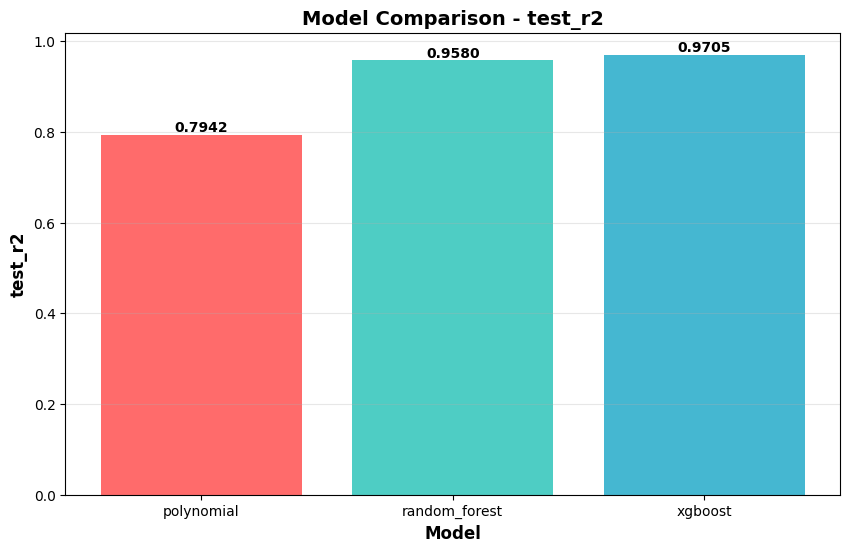

2025-11-23 15:48:49,028 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\comparison_test_rmse.png


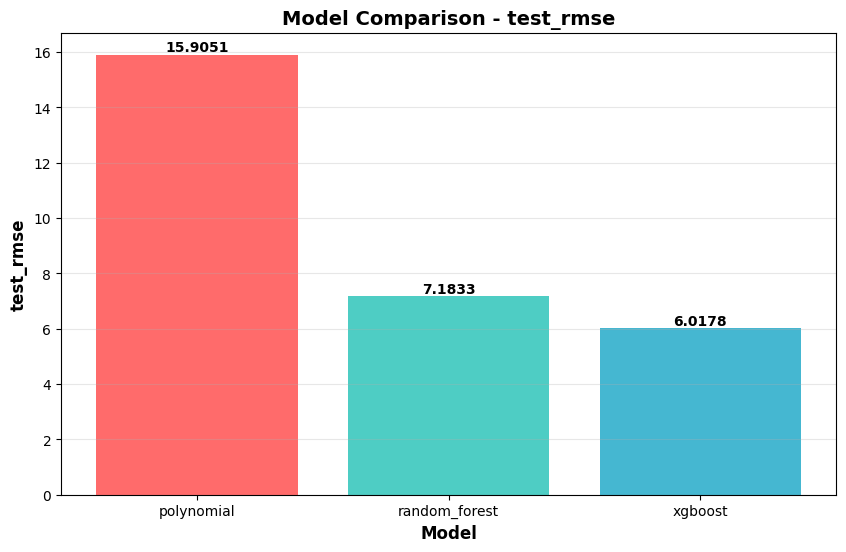

2025-11-23 15:48:49,378 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\comparison_test_mae.png


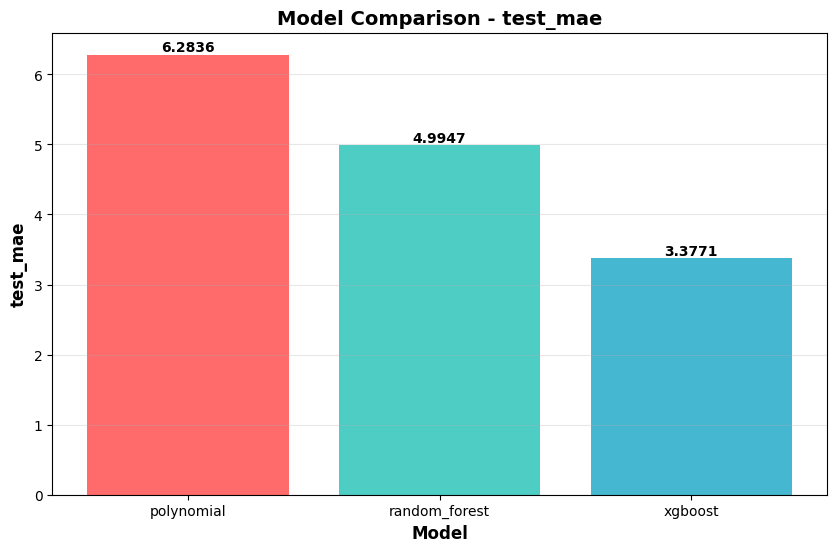

In [156]:
# Vẽ biểu đồ so sánh R² Score
trainer.plot_comparison(metric='test_r2')
trainer.plot_comparison(metric='test_rmse')
trainer.plot_comparison(metric='test_mae')

## 📊 Giải thích R² Score (Coefficient of Determination)

**R² Score** đo lường tỷ lệ phương sai trong dữ liệu được mô hình giải thích:
- **Công thức**: R² = 1 - (SS_res / SS_tot), trong đó:
  - SS_res = tổng bình phương phần dư
  - SS_tot = tổng bình phương độ lệch so với trung bình

### Kết quả so sánh 3 model:
- **Polynomial Regression**: R² = 0.794 (phù hợp trung bình)
  - Mô hình giải thích được 79.4% phương sai → Có nhiều lỗi dự đoán
  
- **Random Forest**: R² = 0.958 (phù hợp tốt)
  - Mô hình giải thích được 95.8% phương sai → Kết quả rất tốt
  
- **XGBoost**: R² = 0.971 ⭐ **(Best Model)**
  - Mô hình giải thích được 97.1% phương sai → Kết quả xuất sắc!

### Kết luận:
**XGBoost** có R² cao nhất, cho thấy nó dự đoán giá trị Trip_Price chính xác nhất.

## 📉 Giải thích RMSE (Root Mean Squared Error)

**RMSE** đo lường độ lỗi dự đoán trung bình (đơn vị giống với dữ liệu gốc):
- **Công thức**: RMSE = √(Σ(y_true - y_pred)² / n)
- **Ý nghĩa**: RMSE càng nhỏ, dự đoán càng chính xác
- **Đặc điểm**: Phạt nặng các lỗi lớn (do bình phương)

### Kết quả so sánh 3 model:
- **Polynomial Regression**: RMSE = 15.905 (sai lệch lớn)
  - Trung bình dự đoán sai khoảng $15.91 → Không phù hợp
  
- **Random Forest**: RMSE = 7.183 (sai lệch vừa phải)
  - Trung bình dự đoán sai khoảng $7.18 → Tốt
  
- **XGBoost**: RMSE = 6.018 ⭐ **(Nhỏ nhất)**
  - Trung bình dự đoán sai khoảng $6.02 → Tốt nhất!

### Kết luận:
**XGBoost** có RMSE nhỏ nhất → dự đoán chính xác hơn các mô hình khác.

## 📈 Giải thích MAE (Mean Absolute Error)

**MAE** đo lường độ lỗi tuyệt đối trung bình:
- **Công thức**: MAE = Σ(|y_true - y_pred|) / n
- **Ý nghĩa**: MAE càng nhỏ, dự đoán càng chính xác
- **Đặc điểm**: Không phạt nặng các lỗi lớn như RMSE

### Kết quả so sánh 3 model:
- **Polynomial Regression**: MAE = 6.284 (sai lệch lớn)
  - Trung bình sai lệch tuyệt đối: $6.28 → Không phù hợp
  
- **Random Forest**: MAE = 4.995 (sai lệch nhỏ)
  - Trung bình sai lệch tuyệt đối: $4.99 → Tốt
  
- **XGBoost**: MAE = 3.377 ⭐ **(Nhỏ nhất)**
  - Trung bình sai lệch tuyệt đối: $3.38 → Tốt nhất!

### Kết luận:
**XGBoost** có MAE nhỏ nhất → các dự đoán không sai lệch quá lớn, dự đoán rất ổn định.

### Vẽ biểu đồ Predictions cho từng mô hình

2025-11-23 15:48:49,494 - __main__ - INFO - 
2025-11-23 15:48:49,495 - __main__ - INFO - 📈 VẼ BIỂU ĐỒ PREDICTIONS CHO TẤT CẢ MÔ HÌNH
2025-11-23 15:48:49,496 - __main__ - INFO - ======================================================================

2025-11-23 15:48:49,495 - __main__ - INFO - 📈 VẼ BIỂU ĐỒ PREDICTIONS CHO TẤT CẢ MÔ HÌNH
2025-11-23 15:48:49,496 - __main__ - INFO - ======================================================================

2025-11-23 15:48:50,112 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\predictions_polynomial.png
2025-11-23 15:48:50,112 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\predictions_polynomial.png


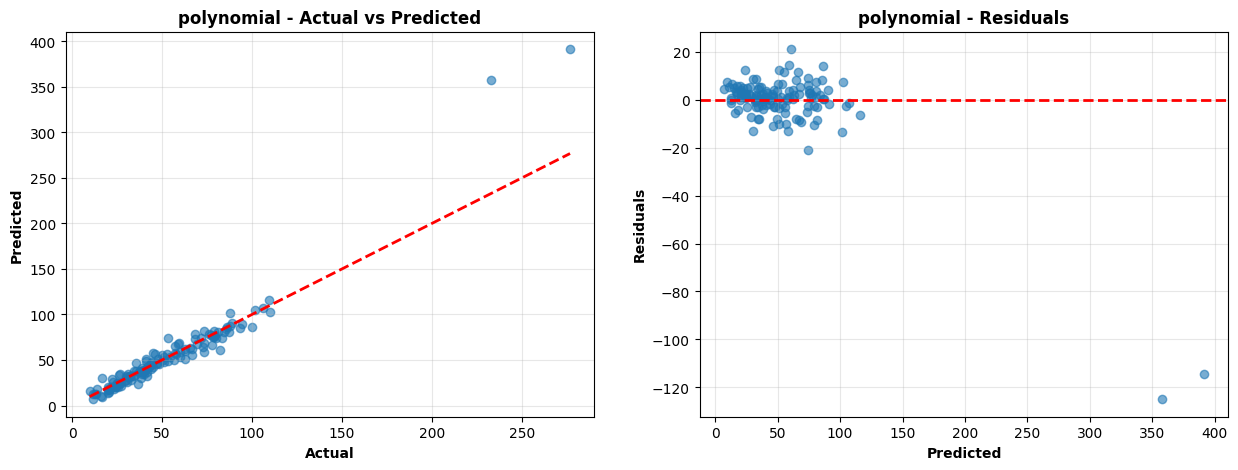

2025-11-23 15:48:51,063 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\predictions_random_forest.png


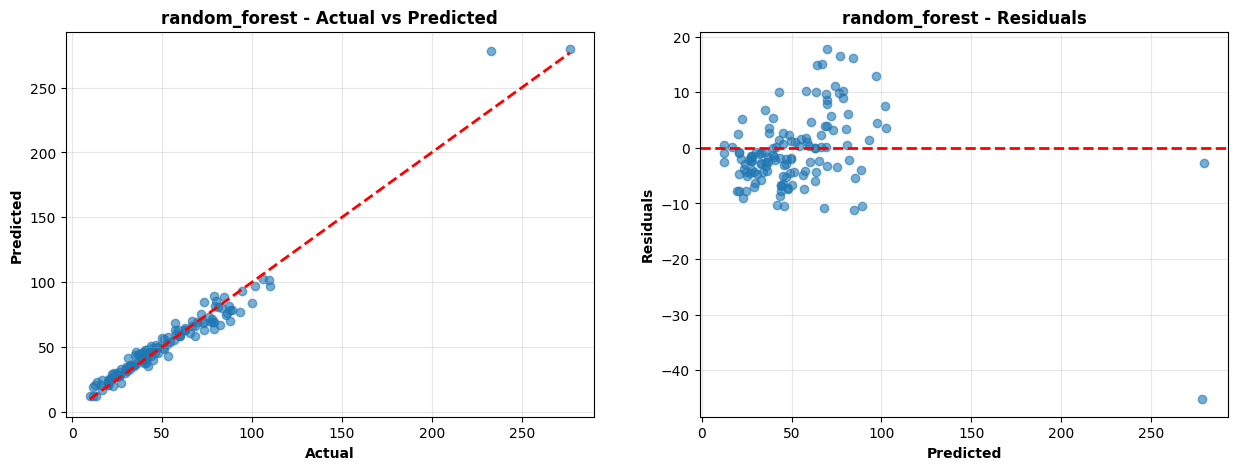

2025-11-23 15:48:51,836 - __main__ - INFO - ✅ Đã lưu biểu đồ: model_results\predictions_xgboost.png


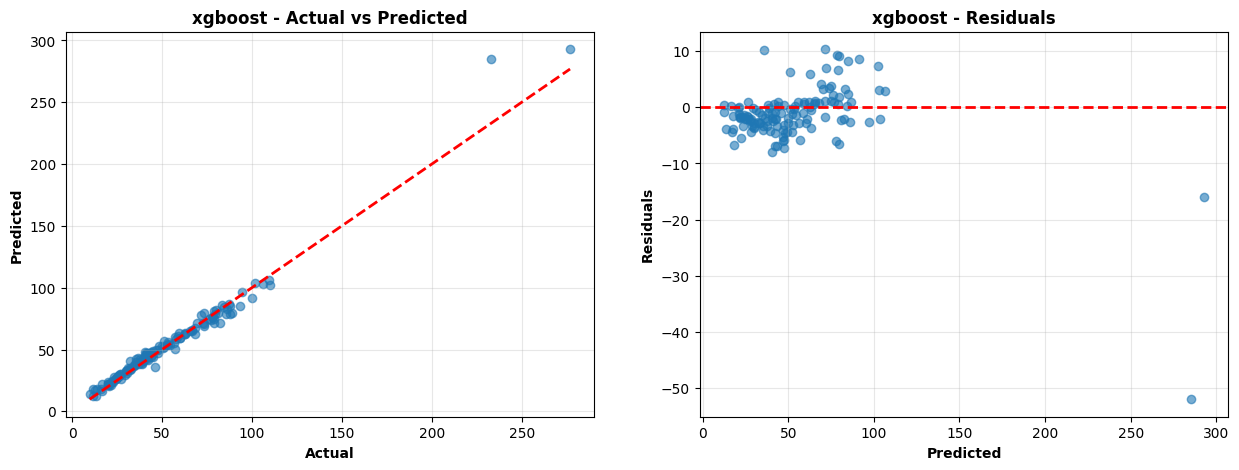

In [157]:
# Vẽ biểu đồ Actual vs Predicted cho tất cả mô hình
trainer.plot_all_predictions()

## 📊 Giải thích biểu đồ Predictions (Actual vs Predicted)

### Scatter Plot (Trái):
- **Trục X**: Giá thực tế (Actual)
- **Trục Y**: Giá dự đoán (Predicted)
- **Đường chéo đỏ**: Đường hoàn hảo (Y=X) - nếu model dự đoán 100% chính xác
- **Ý nghĩa**: Các điểm càng gần đường chéo, dự đoán càng chính xác

### Residuals Plot (Phải):
- **Trục X**: Giá dự đoán (Predicted)
- **Trục Y**: Phần dư (Residuals = Actual - Predicted)
- **Đường ngang đỏ**: Phần dư = 0 (dự đoán hoàn hảo)
- **Ý nghĩa**: 
  - Nếu các điểm phân tán ngẫu nhiên quanh y=0 → Mô hình tốt
  - Nếu có pattern/xu hướng → Mô hình thiếu tính năng hoặc có bias

### Nhận xét cho mỗi model:
- **Polynomial**: Phần dư lớn, phân tán rộng → Mô hình không phù hợp
- **Random Forest**: Phần dư nhỏ hơn, tập trung tốt → Kết quả khá
- **XGBoost**: Phần dư nhỏ nhất, phân tán tốt nhất → Mô hình tốt nhất ⭐

## 📊 Giải thích biểu đồ Predictions (Actual vs Predicted)

### Scatter Plot (Trái):
- **Trục X**: Giá thực tế (Actual)
- **Trục Y**: Giá dự đoán (Predicted)
- **Đường chéo đỏ**: Đường hoàn hảo (Y=X) - nếu model dự đoán 100% chính xác
- **Ý nghĩa**: Các điểm càng gần đường chéo, dự đoán càng chính xác

### Residuals Plot (Phải):
- **Trục X**: Giá dự đoán (Predicted)
- **Trục Y**: Phần dư (Residuals = Actual - Predicted)
- **Đường ngang đỏ**: Phần dư = 0 (dự đoán hoàn hảo)
- **Ý nghĩa**: 
  - Nếu các điểm phân tán ngẫu nhiên quanh y=0 → Mô hình tốt
  - Nếu có pattern/xu hướng → Mô hình thiếu tính năng hoặc có bias

### Nhận xét cho mỗi model:
- **Polynomial**: Phần dư lớn, phân tán rộng → Mô hình không phù hợp
- **Random Forest**: Phần dư nhỏ hơn, tập trung tốt → Kết quả khá
- **XGBoost**: Phần dư nhỏ nhất, phân tán tốt nhất → Mô hình tốt nhất ⭐

In [158]:
# Lưu tất cả các mô hình
trainer.save_all_models(format='joblib')


2025-11-23 15:48:52,079 - __main__ - INFO - 
2025-11-23 15:48:52,079 - __main__ - INFO - 💾 LƯU TẤT CẢ CÁC MÔ HÌNH
2025-11-23 15:48:52,079 - __main__ - INFO - ======================================================================
2025-11-23 15:48:52,079 - __main__ - INFO - ✅ Đã lưu mô hình: model_results\polynomial_20251123_154852.joblib
2025-11-23 15:48:52,079 - __main__ - INFO - 💾 LƯU TẤT CẢ CÁC MÔ HÌNH
2025-11-23 15:48:52,079 - __main__ - INFO - ======================================================================
2025-11-23 15:48:52,079 - __main__ - INFO - ✅ Đã lưu mô hình: model_results\polynomial_20251123_154852.joblib
2025-11-23 15:48:52,129 - __main__ - INFO - ✅ Đã lưu mô hình: model_results\random_forest_20251123_154852.joblib
2025-11-23 15:48:52,138 - __main__ - INFO - ✅ Đã lưu mô hình: model_results\xgboost_20251123_154852.joblib
2025-11-23 15:48:52,139 - __main__ - INFO - 
✅ Hoàn tất lưu 3 mô hình!

2025-11-23 15:48:52,129 - __main__ - INFO - ✅ Đã lưu mô hình: model_results

## Phần 4: Load Model và Predict

In [159]:
# Tạo một trainer instance mới để load model
loader_trainer = ModelTrainer(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    output_dir="./model_results"
)

print("✅ Trainer instance created for loading models")


2025-11-23 15:48:52,157 - __main__ - INFO - ✅ ModelTrainer khởi tạo thành công
2025-11-23 15:48:52,158 - __main__ - INFO -    Train: (529, 15), Test: (133, 15)
2025-11-23 15:48:52,158 - __main__ - INFO -    Train: (529, 15), Test: (133, 15)


✅ Trainer instance created for loading models


In [160]:
# Tìm file model đã lưu gần nhất
import glob

model_files = glob.glob('./model_results/*.joblib')
if model_files:
    print(f"✅ Tìm thấy {len(model_files)} file mô hình:")
    for f in model_files:
        print(f"   - {f}")
else:
    print("❌ Không tìm thấy file mô hình nào")


✅ Tìm thấy 15 file mô hình:
   - ./model_results\polynomial_20251122_205239.joblib
   - ./model_results\polynomial_20251123_152653.joblib
   - ./model_results\polynomial_20251123_152946.joblib
   - ./model_results\polynomial_20251123_154038.joblib
   - ./model_results\polynomial_20251123_154852.joblib
   - ./model_results\random_forest_20251122_205239.joblib
   - ./model_results\random_forest_20251123_152653.joblib
   - ./model_results\random_forest_20251123_152946.joblib
   - ./model_results\random_forest_20251123_154038.joblib
   - ./model_results\random_forest_20251123_154852.joblib
   - ./model_results\xgboost_20251122_205239.joblib
   - ./model_results\xgboost_20251123_152653.joblib
   - ./model_results\xgboost_20251123_152946.joblib
   - ./model_results\xgboost_20251123_154038.joblib
   - ./model_results\xgboost_20251123_154852.joblib


In [161]:
# Load XGBoost model (best model)
xgb_model_path = [f for f in model_files if 'xgboost' in f][-1]  # Lấy file mới nhất

loader_trainer.load_model(xgb_model_path, model_name='xgboost')
print(f"✅ Đã load XGBoost model từ: {xgb_model_path}")


2025-11-23 15:48:52,222 - __main__ - INFO - ✅ Đã tải mô hình: model_results\xgboost_20251123_154852.joblib


✅ Đã load XGBoost model từ: ./model_results\xgboost_20251123_154852.joblib


In [162]:
# Dự đoán trên test set
xgb_model = loader_trainer.models['xgboost']['model']
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá kết quả
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

test_r2 = r2_score(y_test, y_pred_xgb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
test_mae = mean_absolute_error(y_test, y_pred_xgb)

print(f"\n{'='*70}")
print("📊 KẾT QUẢ DỰ ĐOÁN CỦA XGBoost MODEL")
print(f"{'='*70}")
print(f"Test R²: {test_r2:.6f}")
print(f"Test RMSE: {test_rmse:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"{'='*70}\n")



📊 KẾT QUẢ DỰ ĐOÁN CỦA XGBoost MODEL
Test R²: 0.970535
Test RMSE: 6.017782
Test MAE: 3.377127



In [163]:
# Dự đoán trên một số mẫu cụ thể
print("📈 DỰ ĐOÁN TRÊN CÁC MẪU CỤ THỂ:")
print(f"{'='*70}")

# Lấy 5 mẫu từ test set
sample_indices = [0, 10, 20, 30, 40]

comparison_data = []
for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred_xgb[idx]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    comparison_data.append({
        'Index': idx,
        'Actual': f"${actual:.2f}",
        'Predicted': f"${predicted:.2f}",
        'Error': f"${error:.2f}",
        'Error %': f"{error_pct:.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print(f"{'='*70}\n")


📈 DỰ ĐOÁN TRÊN CÁC MẪU CỤ THỂ:
 Index  Actual Predicted  Error Error %
     0  $48.00    $47.52  $0.47   0.99%
    10  $82.08    $71.71 $10.37  12.64%
    20  $57.75    $58.69  $0.93   1.62%
    30 $109.43   $106.52  $2.91   2.66%
    40  $51.06    $52.23  $1.17   2.30%



## Cách sử dụng Model để Predict

### Bước 1: Khởi tạo trainer instance
```python
new_trainer = ModelTrainer(X_train, X_test, y_train, y_test, output_dir="./model_results")
```

### Bước 2: Load model
```python
model_path = "./model_results/xgboost_20250101_120000.joblib"
new_trainer.load_model(model_path, model_name='xgboost')
```

### Bước 3: Predict
```python
model = new_trainer.models['xgboost']['model']
predictions = model.predict(X_test)
```

### Bước 4: Đánh giá kết quả
```python
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
```
